# Telecom Churn

## <font color='brown'>Problem Statement
    
#### Business Problem Overview
    In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal.
 
    To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

    In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# --------------------------------------------------------------------------------------------------------------

# Steps to build the model:
<ol>
    <li><strong>Preprocess data</strong>
    <li><strong>Conduct appropriate exploratory analysis to extract useful insights</strong>
    <li><strong>Derive new features</strong>
    <li><strong>Filter high-value customers</strong>
    <li><strong>Tag churners and remove attributes of the churn phase</strong>
    <li><strong>Reduce the number of variables using PCA</strong>
    <li><strong>Train a variety of models, tune model hyperparameters, etc.</strong>
    <li><strong>Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.</strong>
    <li><strong>Selecting model based on some evaluation metric.</strong>
</ul>

# --------------------------------------------------------------------------------------------------------------

# Importing the required Libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 230)
print('='*123)

# <font color='navy'>--------------------------------------------------------------------------------------------------------------

# Importing Data

In [2]:
data = pd.read_csv("telecom_churn_data.csv")
print('='*123)

## <font color='green'>Data understanding

In [3]:
data.shape

(99999, 226)

In [4]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

# <font color='navy'>--------------------------------------------------------------------------------------------------------------
### <font color='brown'>Identifying the Categorical and Numerical Varibles in the dataset

In [7]:
id_cols = ['mobile_number', 'circle_id']

dates_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
             'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7',
             'date_of_last_rech_data_8','date_of_last_rech_data_9']

cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8',
             'fb_user_9']

num_cols = [column for column in data.columns if column not in id_cols + dates_cols + cat_cols]

# print the number of columns in each list
print("Category columns: %d\nNumeric columnss:%d" % (len(cat_cols),len(num_cols)))

Category columns: 8
Numeric columnss:204


# <font color='navy'>--------------------------------------------------------------------------------------------------------------

## <font color='green'>Columns having meaningful missing

In [8]:
round(data.isnull().sum()/data.shape[0],2)*100

mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6             4.0
loc_og_t2t

In [9]:
# replacing the null values with "0"

data["total_rech_amt_6"].fillna(0, inplace = True)
data["total_rech_amt_7"].fillna(0, inplace = True)
data["total_rech_amt_8"].fillna(0, inplace = True)
data["total_rech_amt_9"].fillna(0, inplace = True)
data["total_rech_data_6"].fillna(0, inplace = True)
data["total_rech_data_7"].fillna(0, inplace = True)
data["total_rech_data_8"].fillna(0, inplace = True)
data["total_rech_data_9"].fillna(0, inplace = True)
data["av_rech_amt_data_6"].fillna(0, inplace = True)
data["av_rech_amt_data_7"].fillna(0, inplace = True)
data["av_rech_amt_data_8"].fillna(0, inplace = True)
data["av_rech_amt_data_9"].fillna(0, inplace = True)
data["total_rech_data_6"].fillna(0, inplace = True)
data["total_rech_data_7"].fillna(0, inplace = True)
data["total_rech_data_8"].fillna(0, inplace = True)
data["total_rech_data_9"].fillna(0, inplace = True)
data["max_rech_data_6"].fillna(0, inplace = True)
data["max_rech_data_7"].fillna(0, inplace = True)
data["max_rech_data_8"].fillna(0, inplace = True)
data["max_rech_data_9"].fillna(0, inplace = True)

In [10]:
data["date_of_last_rech_data_6"].fillna(0, inplace = True)
data["date_of_last_rech_data_7"].fillna(0, inplace = True)
data["date_of_last_rech_data_8"].fillna(0, inplace = True)

In [11]:
a = 0
b = 0
c = 0
for i in range (0,len(data)):
    if data["total_rech_data_6"][i] == 0 and data["date_of_last_rech_data_6"][i] is not 0:
        a +=1
    if data["total_rech_data_7"][i] == 0 and data["date_of_last_rech_data_7"][i] is not 0:
        b +=1
    if data["total_rech_data_8"][i] == 0 and data["date_of_last_rech_data_8"][i] is not 0:
        c +=1
print(a)
print(b)
print(c) 

0
0
0


In [12]:
data = data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'], 1)

In [13]:
# replacing null values with '-1' in categorical columns

data[cat_cols] = data[cat_cols].apply(lambda x: x.fillna(-1))

In [14]:
# dropping the coloums that have all value are '0' and constant

data = data.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',], 1)

###  <font color='red'> **Note:** Unable to execute Fancyimpute to replace null values because Fancyimpute package was not working on our systems.

In [15]:
#dropping the columns where percentage of null values is greater than 70 percentage

column_with_nan = data.columns[data.isnull().any()]

for column in column_with_nan:
    if data[column].isnull().sum()*100/data.shape[0]>70:
        data.drop(column,1,inplace=True)
data.shape

(99999, 193)

# <font color='navy'>--------------------------------------------------------------------------------------------------------------

# Derive new features

`8 Month` : The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

`6 and 7 Month` : The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

In [16]:
data['arpu_diff'] = data.arpu_8 - ((data.arpu_6 + data.arpu_7)/2) # Average revenue per user
data['total_rech_num_diff'] = data.total_rech_num_8 - ((data.total_rech_num_6 + data.total_rech_num_7)/2)
data['max_rech_amt_diff'] = data.max_rech_amt_8 - ((data.max_rech_amt_6 + data.max_rech_amt_7)/2)

In [17]:
data['arpu_diff'].describe()

count    99999.000000
mean        -1.607272
std        231.440187
min      -5811.052500
25%        -85.707250
50%         -5.930500
75%         76.934500
max      12808.617000
Name: arpu_diff, dtype: float64

In [18]:
data['total_rech_num_diff'].describe()

count    99999.000000
mean        -0.416674
std          5.552724
min       -147.500000
25%         -2.500000
50%         -0.500000
75%          1.500000
max        130.500000
Name: total_rech_num_diff, dtype: float64

In [19]:
data['max_rech_amt_diff'].describe()

count    99999.000000
mean         3.033265
std        105.562283
min      -3010.000000
25%        -25.000000
50%          0.000000
75%         30.000000
max       3949.000000
Name: max_rech_amt_diff, dtype: float64

# <font color='navy'>--------------------------------------------------------------------------------------------------------------

## Filter high-value customers

    we need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [20]:
# first lets find out total amount each customer spend on data recharge 
# "av_rech_amt_data_x" (x represents month here, would be either 6 or 7)
# "total_rech_data_x" (x represnts month here, would be either 6 or 7)
# we will create a new column "total_rech_amt_data_x" in which we will be calculating : "av_rech_amt_data_x" * "total_rech_data_x"

data['total_rech_amt_data_6'] = data.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
data['total_rech_amt_data_7'] = data.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [21]:
# Calculating average amount for voice and data

data['avg_rech_amt_6_7'] = data.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+ 
                                                  x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

In [22]:
data['avg_rech_amt_6_7'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
10%         60.000000
20%        108.500000
30%        155.000000
40%        209.500000
50%        275.000000
60%        360.000000
70%        478.000000
80%        656.500000
90%       1028.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [23]:
# discretize variable into equal-size buckets

data['avg_rech_decile'] = pd.qcut(data['avg_rech_amt_6_7'], 10, labels=False)

In [24]:
# Selecting high value customers belonging to 70 percentile and above
# Storing the data of high value customers in a new data set : data_high_value

data_high_value = data[data.avg_rech_decile >= 7 ]

In [25]:
data_high_value.shape

(29953, 200)

# <font color='navy'>--------------------------------------------------------------------------------------------------------------

# Tag churners
    The attributes you need to use to tag churners are:

- `total_ic_mou_9`

- `total_og_mou_9`

- `vol_2g_mb_9`

- `vol_3g_mb_9`

In [26]:
# Checking for null values 

data_high_value[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().any()

total_ic_mou_9    False
total_og_mou_9    False
vol_2g_mb_9       False
vol_3g_mb_9       False
dtype: bool

In [27]:
data_high_value['churn'] = np.where(data_high_value[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
data_high_value.head()

,mobile_number,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_6_7,avg_rech_decile,churn
0,7000842753,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,7.7025,-1.5,0.0,252.0,252.0,559.0,7,1
7,7000701601,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.

In [28]:
print(data_high_value.groupby('churn').size())
print('='*123)

churn
0    27520
1     2433
dtype: int64


#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [29]:
month_9_col = data_high_value.filter(regex='_9')
print(month_9_col.columns)
print('='*123)

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9'],
      dtype='objec

In [30]:
data_1  = data_high_value.drop(month_9_col.columns, axis=1)
data_1.shape

(29953, 152)

In [31]:
cat_list = ['night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','churn']

In [32]:
#dropping dates coloums
data_1 = data_1.drop(["date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8"], axis =1)

In [33]:
numlist = []
for x in data_1.columns:
    if x not in(cat_list):
        numlist.append(x)

In [34]:
data_1[numlist] = data_1[numlist].replace(np.nan, 0, regex=True)

In [35]:
round(data_1.isnull().sum()/data_1.shape[0],2)*100

mobile_number            0.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou

In [36]:
numlist_1 = numlist[1:]

# <font color='navy'>--------------------------------------------------------------------------------------------------------------

# Outlier Treatment

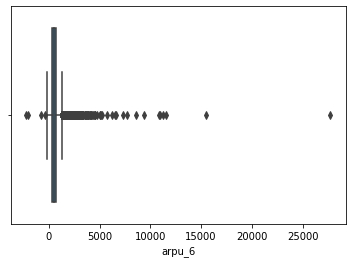

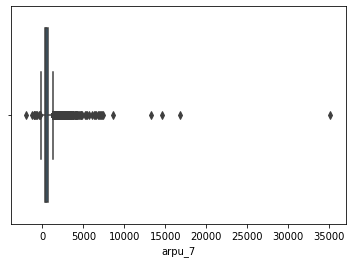

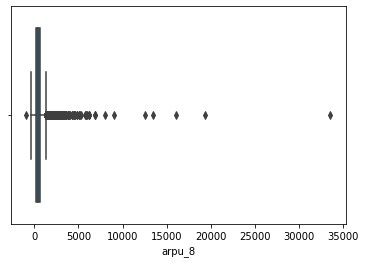

In [37]:
sns.boxplot(data_1['arpu_6'])
plt.show()
sns.boxplot(data_1['arpu_7'])
plt.show()
sns.boxplot(data_1['arpu_8'])
plt.show()

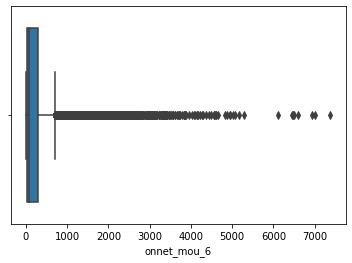

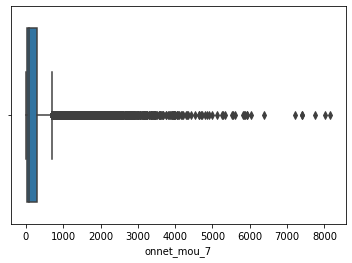

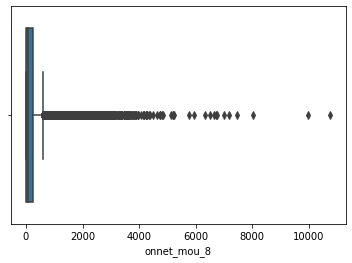

In [38]:
sns.boxplot(data_1['onnet_mou_6'])
plt.show()
sns.boxplot(data_1['onnet_mou_7'])
plt.show()
sns.boxplot(data_1['onnet_mou_8'])
plt.show()

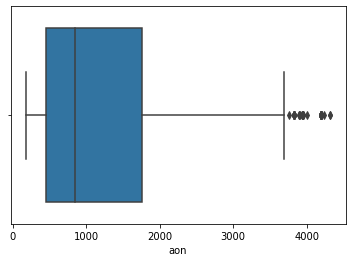

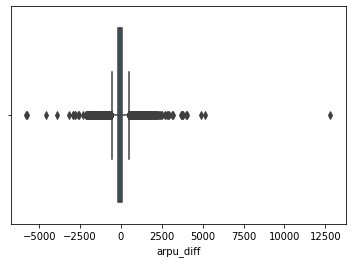

In [39]:
sns.boxplot(data_1['aon'])
plt.show()

sns.boxplot(data_1['arpu_diff'])
plt.show()

In [40]:
# Outliers treatment
def outlier(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [41]:
data_1[numlist_1]=data_1[numlist_1].apply(lambda x: outlier(x))

In [42]:
data_1.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_6_7,avg_rech_decile,churn
0,7000842753,197.385,214.816,213.8030,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362.0,252.0,252.00,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,7.70250,-1.5,0.0,252.0,252.0,559.0,7,1
7,7000701601,1069.180,1349.850,1986.7396,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,51.4088,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580.0,790.0,2341.48,1000,790,951,0,0,565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,855.52606,2.0,323.0,0.0,0.0,1185.0,9,1
8,7001524846,378.721,492.223,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.3

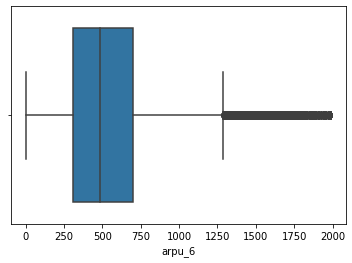

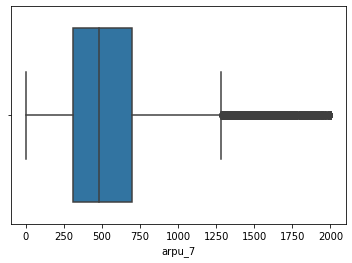

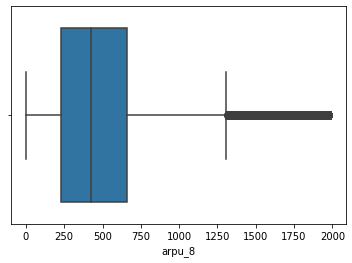

In [43]:
sns.boxplot(data_1['arpu_6'])
plt.show()
sns.boxplot(data_1['arpu_7'])
plt.show()
sns.boxplot(data_1['arpu_8'])
plt.show()

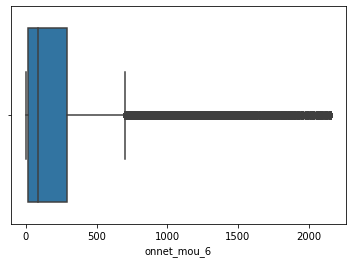

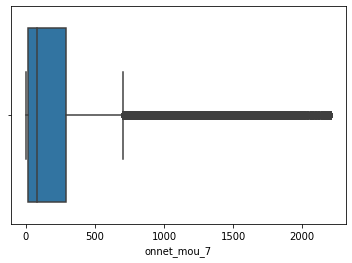

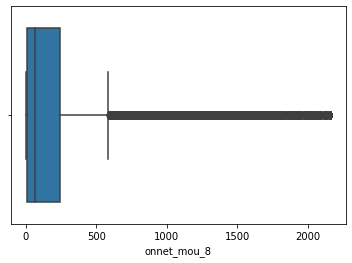

In [44]:
sns.boxplot(data_1['onnet_mou_6'])
plt.show()
sns.boxplot(data_1['onnet_mou_7'])
plt.show()
sns.boxplot(data_1['onnet_mou_8'])
plt.show()

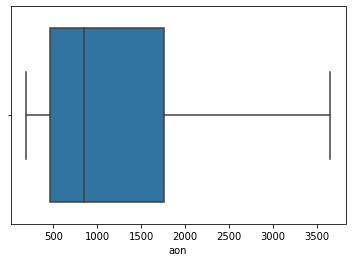

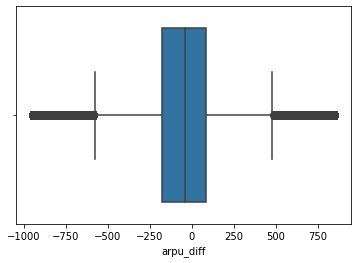

In [45]:
sns.boxplot(data_1['aon'])
plt.show()
sns.boxplot(data_1['arpu_diff'])
plt.show()

# <font color='navy'>--------------------------------------------------------------------------------------------------------------
# <font color='orange'>--------------------------------------------------------------------------------------------------------------

# <font color='grey'>Exploratory Data Analysis

Churn : 2433 , ( 8.122725603445398 %)
Not Churn : 27520 , ( 91.8772743965546 %)


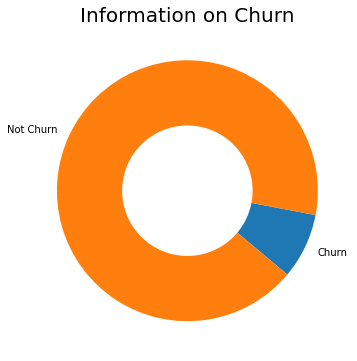

In [46]:
churn_counts = data_high_value["churn"].value_counts()

print("Churn :", churn_counts[1], ", (", (churn_counts[1]/(churn_counts[1]+churn_counts[0]))*100,"%)")
print("Not Churn :", churn_counts[0], ", (", (churn_counts[0]/(churn_counts[1]+churn_counts[0]))*100,"%)")

print("="*123)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Churn", "Not Churn"]

churn = [churn_counts[1], churn_counts[0]]

plt.pie(churn, wedgeprops=dict(width=0.5), startangle=-40,labels = recipe)




plt.title('Information on Churn', fontsize=20)
plt.show()
print('='*123)

### <font color='green'>Observations :

- Not Churn : 91.88 %
- Churn : 8.12 %
- The Data Set is imbalance Data Set : As we can infer from the above chart, the number of customers who churn constitute a really small percentage ~8%.
- This can be lead to safely assume that the data is skewed and to counter this, we need to sample and balance the data.

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

## Uni-variant Analysis

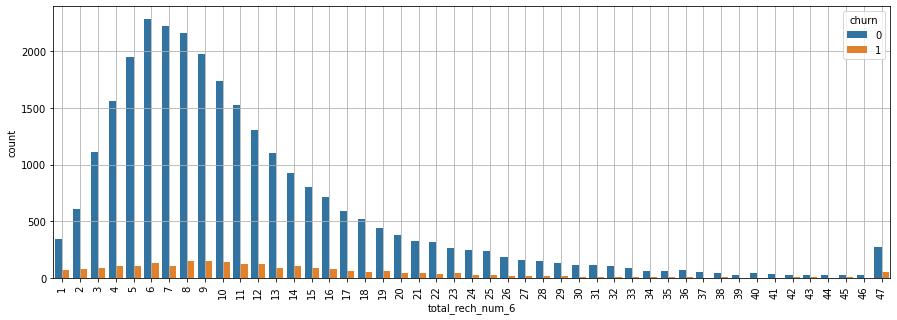

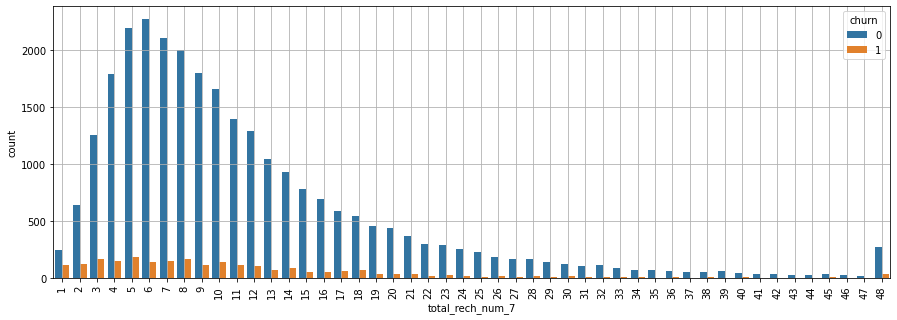

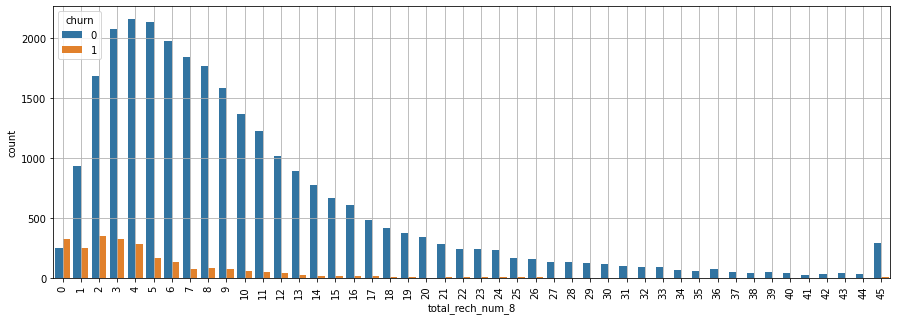

In [47]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(data_1["total_rech_num_6"], hue=data_1.churn)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,5))
s1=sns.countplot(data_1["total_rech_num_7"], hue=data_1.churn)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,5))
s1=sns.countplot(data_1["total_rech_num_8"], hue=data_1.churn)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

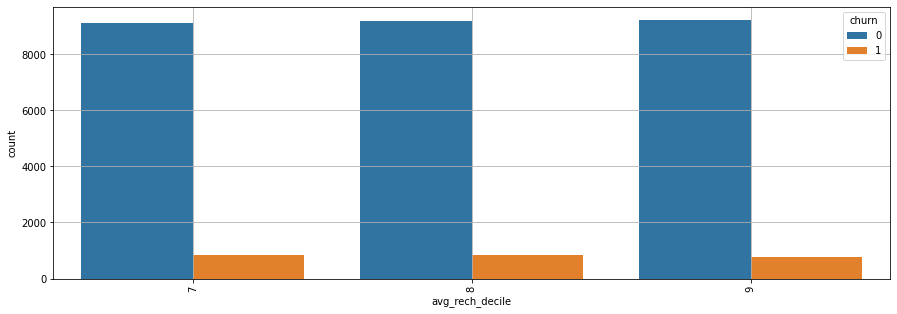

In [48]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data_1["avg_rech_decile"], hue=data_1.churn)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

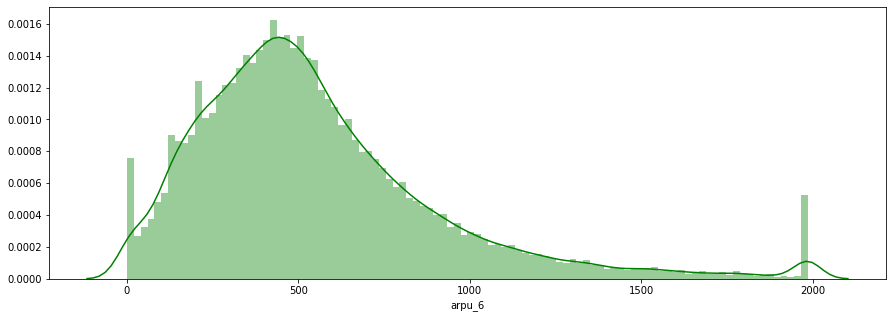

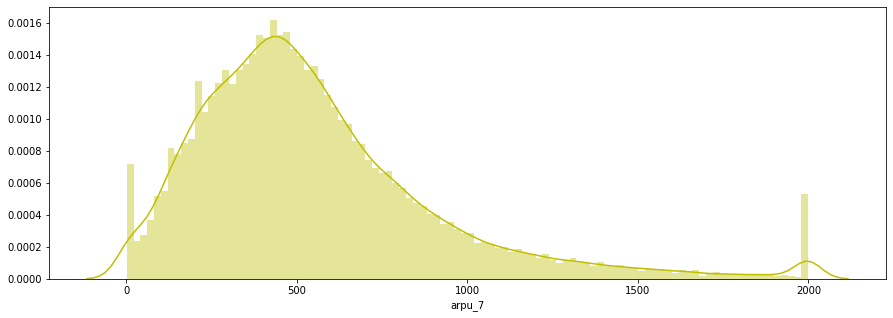

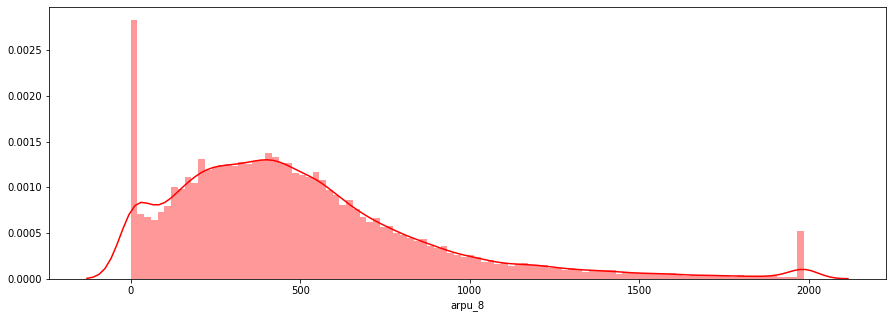

In [49]:
plt.figure(figsize=(15,5))
sns.distplot(data_1['arpu_6'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(data_1['arpu_7'], color='y', bins=100, hist_kws={'alpha': 0.4});
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(data_1['arpu_8'], color='r', bins=100, hist_kws={'alpha': 0.4});
plt.show()

### <font color='green'>Observations:
    The Average Revenue shows a pretty normal distribution during months 6 and 7.
    However, in month 8, there is a slight change in the pattern - the revenue has reduced and also distribution is looking less normal.

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

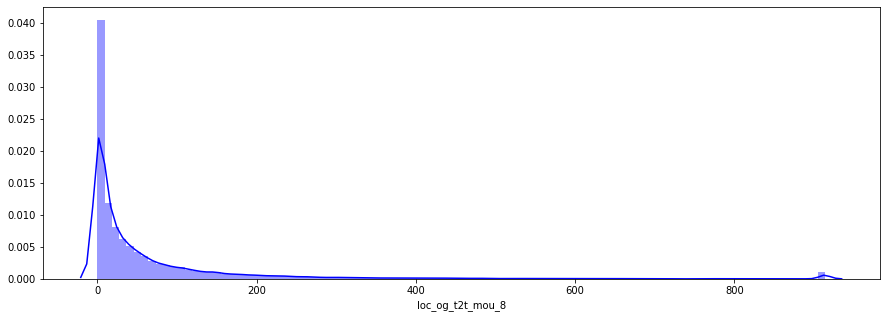

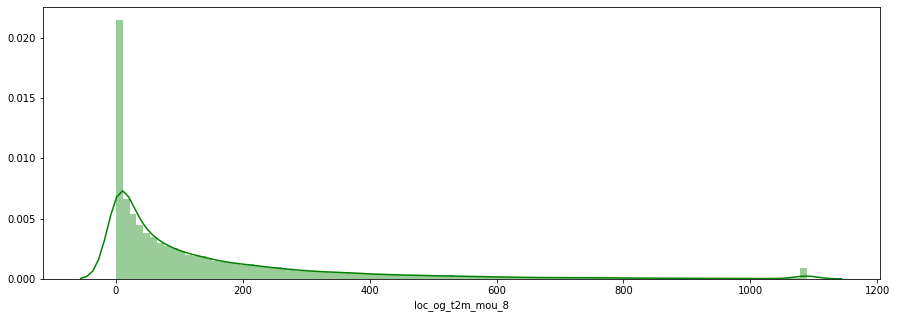

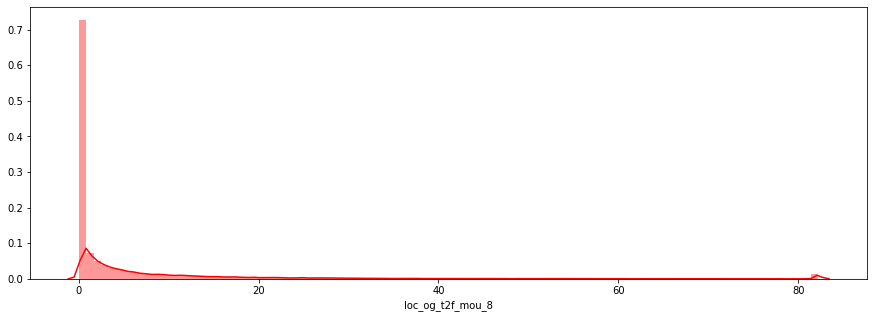

In [50]:
plt.figure(figsize=(15,5))
sns.distplot(data_1['loc_og_t2t_mou_8'], color='b', bins=100, hist_kws={'alpha': 0.4});
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(data_1['loc_og_t2m_mou_8'], color='g', bins=100, hist_kws={'alpha': 0.4});
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(data_1['loc_og_t2f_mou_8'], color='r', bins=100, hist_kws={'alpha': 0.4});
plt.show()

### <font color='green'>Observations:
    The outgoing calls are higher during months 6 and 7.
    However, in month 8, the outgoing calls drop clearly indicating a pattern when you compare with the drop in average revenue before.

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

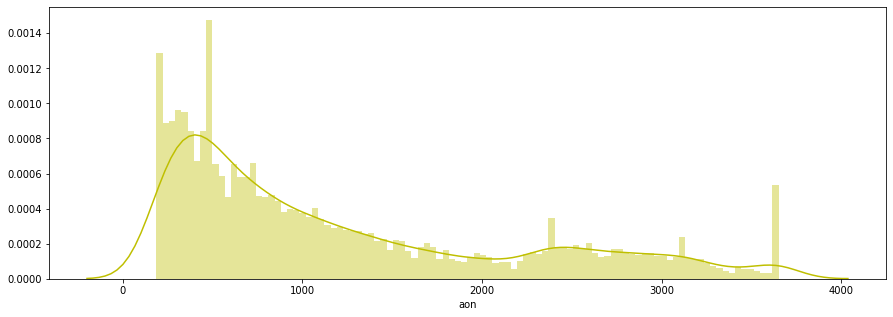

In [51]:
plt.figure(figsize=(15,5))
sns.distplot(data_1['aon'], color='y', bins=100, hist_kws={'alpha': 0.4});
plt.show()

### <font color='green'>Observations:
    There seem to be fair share of people who seem to have spent atleast a year or so.
    One thing to infer here is that there are also quite a good chunk of people who have been faithful customers 
    since years.

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

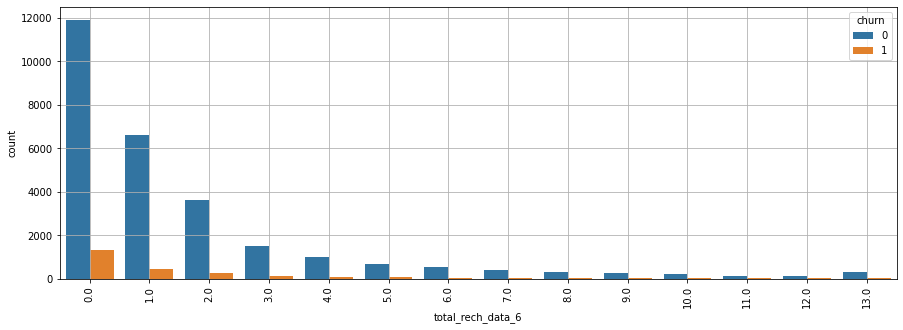

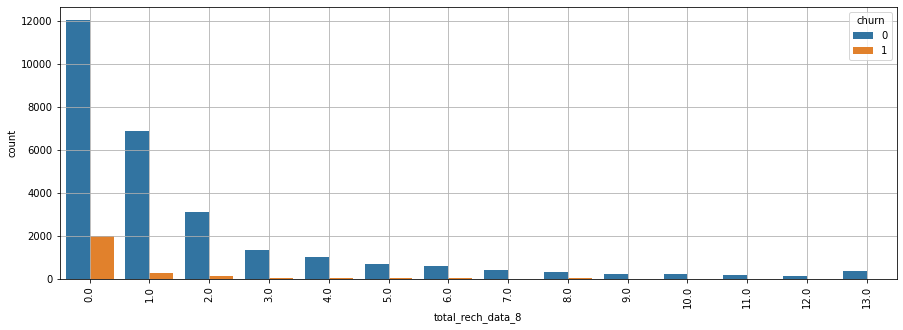

In [52]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data_1["total_rech_data_6"], hue=data_1.churn)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,5))
s1=sns.countplot(data_1["total_rech_data_8"], hue=data_1.churn)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### <font color='green'>Observations:
    The Total data recharged by the customers who haven't churned have almost remained the same.
    but the churned customers data recharge has dropped very significantly.

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

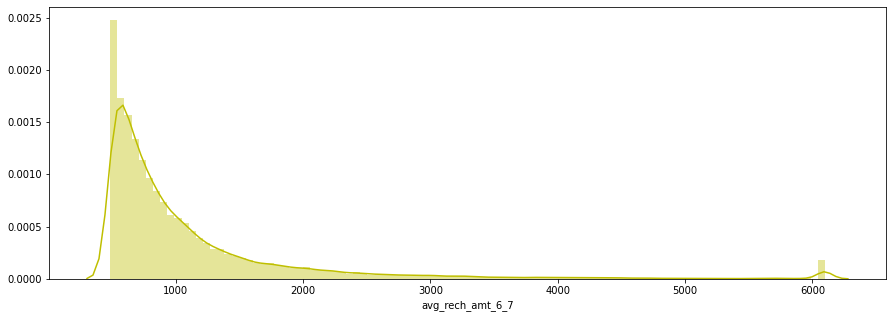

In [53]:
plt.figure(figsize=(15,5))
sns.distplot(data_1['avg_rech_amt_6_7'], color='y', bins=100, hist_kws={'alpha': 0.4});
plt.show()

# <font color='orange'>--------------------------------------------------------------------------------------------------------------
# <font color='orange'>--------------------------------------------------------------------------------------------------------------

## Bi-variant Analysis

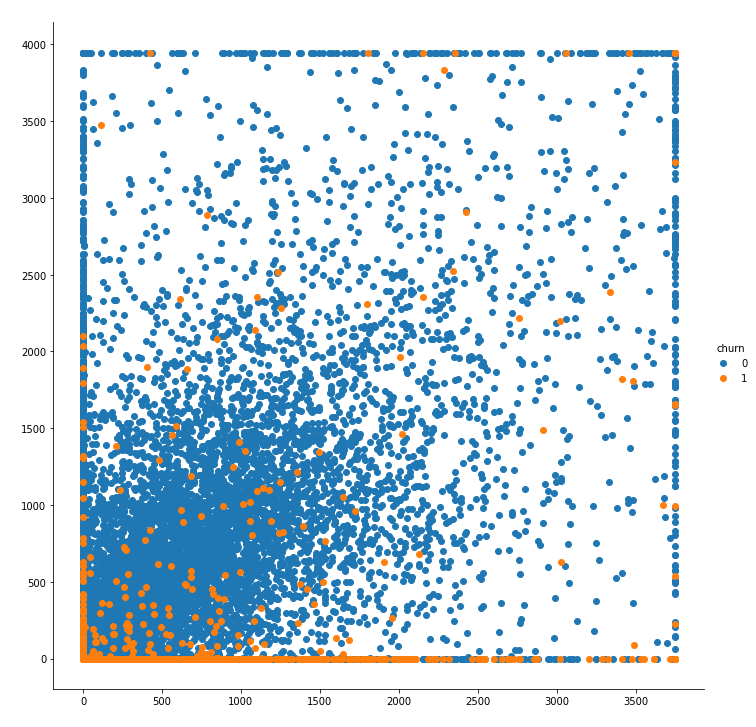

In [54]:
(sns
 .FacetGrid(data_1, hue='churn', size=10)
 .map(plt.scatter, 'vol_3g_mb_6', 'vol_3g_mb_8')
 .add_legend()
 .set(
    title=' ',
    xlabel=' ',
    ylabel=' '
))

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

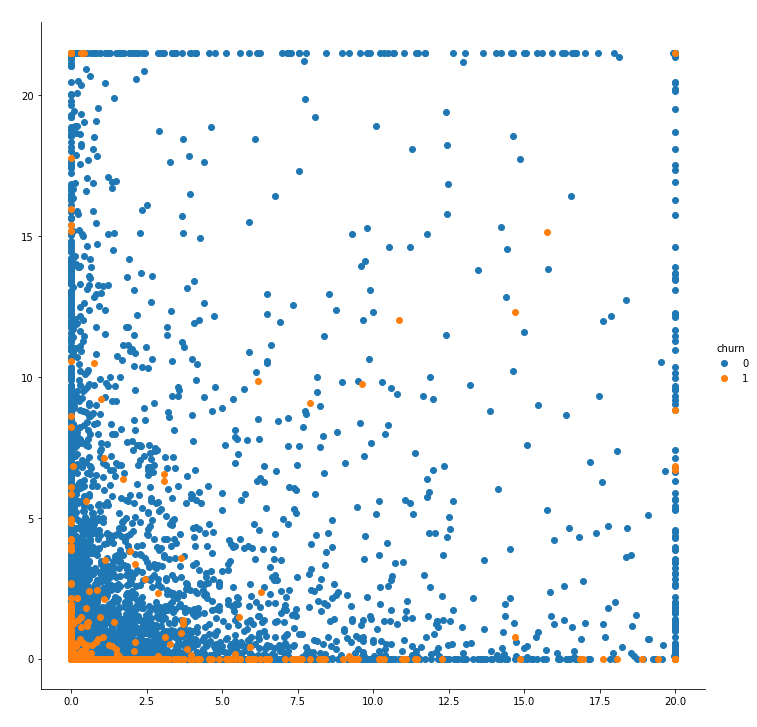

In [55]:
(sns
 .FacetGrid(data_1, hue='churn', size=10)
 .map(plt.scatter, 'ic_others_6', 'ic_others_8')
 .add_legend()
 .set(
    title=' ',
    xlabel=' ',
    ylabel=' '
))

# <font color='orange'>--------------------------------------------------------------------------------------------------------------

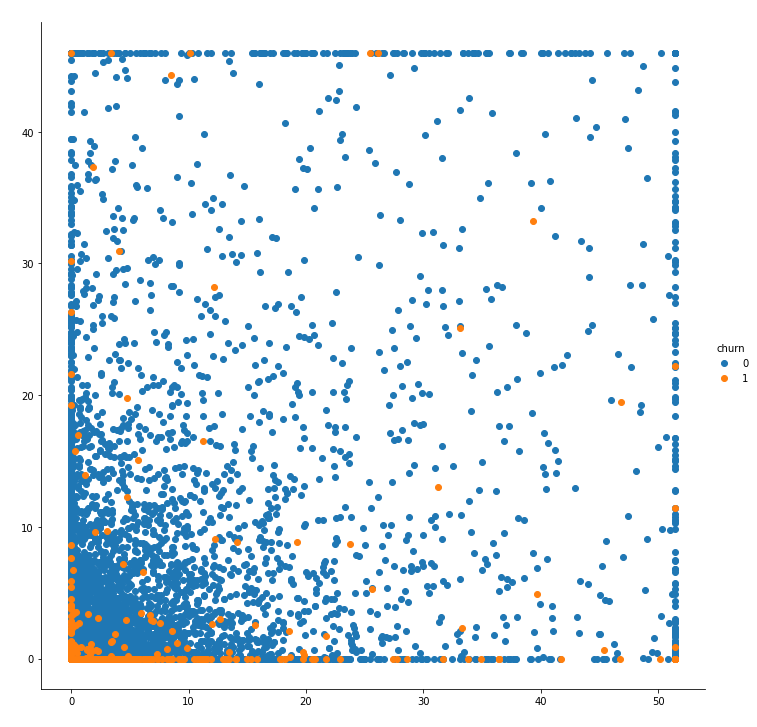

In [56]:
(sns
 .FacetGrid(data_1, hue='churn', size=10)
 .map(plt.scatter, 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_8')
 .add_legend()
 .set(
    title=' ',
    xlabel=' ',
    ylabel=' '
))

### <font color='green'>Observations:
    Except for the amount of 3g data, incoming call data shows a similar pattern.
    The Number of customers who churn tend to use the network lesser and lesser as shown in the above Scatter plots.

# <font color='orange'>--------------------------------------------------------------------------------------------------------------
# <font color='navy'>--------------------------------------------------------------------------------------------------------------

## Aggregating the categorical columns

In [57]:
for x in cat_list:
    print(x)
    print(data_1[x].unique())

night_pck_user_6
[ 0. -1.  1.]
night_pck_user_7
[ 0. -1.  1.]
night_pck_user_8
[ 0. -1.  1.]
fb_user_6
[ 1. -1.  0.]
fb_user_7
[ 1. -1.  0.]
fb_user_8
[ 1. -1.  0.]
churn
[1 0]


In [58]:
cat_list2 = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]

In [59]:
# aggregate the categorical variables
print(data_1.groupby('night_pck_user_6').churn.mean())
print(data_1.groupby('night_pck_user_7').churn.mean())
print(data_1.groupby('night_pck_user_8').churn.mean())
print(data_1.groupby('fb_user_6').churn.mean())
print(data_1.groupby('fb_user_7').churn.mean())
print(data_1.groupby('fb_user_8').churn.mean())

night_pck_user_6
-1.0    0.098464
 0.0    0.066981
 1.0    0.093366
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.114518
 0.0    0.055872
 1.0    0.061333
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.140819
 0.0    0.028857
 1.0    0.026393
Name: churn, dtype: float64
fb_user_6
-1.0    0.098464
 0.0    0.077299
 1.0    0.066856
Name: churn, dtype: float64
fb_user_7
-1.0    0.114518
 0.0    0.066017
 1.0    0.055142
Name: churn, dtype: float64
fb_user_8
-1.0    0.140819
 0.0    0.067766
 1.0    0.024341
Name: churn, dtype: float64


In [60]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.098464, 0: 0.066981, 1: 0.093366},
           'night_pck_user_7' : {-1: 0.114518, 0: 0.055872, 1: 0.061333},
           'night_pck_user_8' : {-1: 0.140819, 0: 0.028857, 1: 0.026393},
           'fb_user_6'        : {-1: 0.098464, 0: 0.077299, 1: 0.066856},
           'fb_user_7'        : {-1: 0.114518, 0: 0.066017, 1: 0.055142},
           'fb_user_8'        : {-1: 0.140819, 0: 0.067766, 1: 0.024341}
          }
data_1.replace(mapping, inplace = True)

In [61]:
cols = data_1.columns.difference(['churn', 'mobile_number'])

X = data_1.drop(['churn','mobile_number'],axis=1)
y = data_1['churn']

In [62]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_6_7,avg_rech_decile
0,197.385,214.816,213.8030,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362.0,252.0,252.00,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.066981,0.055872,0.028857,0,0,0,0,0,0,1,1,1,0,0,0,0.066856,0.055142,0.024341,968,30.40,0.00,101.20,3.58,7.70250,-1.5,0.0,252.0,252.0,559.0,7
7,1069.180,1349.850,1986.7396,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,51.4088,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580.0,790.0,2341.48,1000,790,951,0,0,565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.098464,0.114518,0.140819,0,0,0,0,0,0,0,0,0,0,0,0,0.098464,0.114518,0.140819,802,57.74,19.38,18.74,0.00,855.52606,2.0,323.0,0.0,0.0,1185.0,9
8,378.721,492.223,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,4

# <font color='navy'>--------------------------------------------------------------------------------------------------------------

## Feature Standardisation

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [64]:
scaled_features = scaler.fit_transform(X)

In [65]:
X_1 = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [66]:
X_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_diff,total_rech_num_diff,max_rech_amt_diff,total_rech_amt_data_6,total_rech_amt_data_7,avg_rech_amt_6_7,avg_rech_decile
0,-0.981849,-0.933663,-0.742786,-0.624856,-0.618585,-0.575574,-0.842401,-0.832374,-0.793468,-0.275056,-0.248802,-0.250656,-0.286684,-0.265592,-0.264347,-0.508998,-0.508524,-0.509802,-0.741816,-0.754888,-0.722018,-0.410520,-0.414553,-0.407349,-0.340942,-0.350188,-0.337021,-0.755010,-0.769262,-0.738148,-0.452274,-0.456537,-0.416641,-0.485984,-0.481817,-0.452620,-0.240016,-0.236917,-0.233759,-0.607761,-0.609112,-0.552813,-0.157884,-0.159483,-0.150496,-0.469765,-0.502189,-0.491209,-0.37893,0.0,0.0,-0.939414,-0.937787,-0.855577,-0.604068,-0.600674,-0.588672,-0.801786,-0.818905,-0.767426,-0.447105,-0.444118,-0.407171,-0.839681,-0.846666,-0.797692,-0.383123,-0.380757,-0.361588,-0.459716,-0.455773,-0.445853,-0.277944,-0.280479,-0.282976,-0.494363,-0.489642,-0.475390,-0.893507,-0.895127,-0.846440,-0.429496,-0.224978,-0.264379,-0.252731,-0.261839,-0.251235,-0.255462,-0.255978,-0.253398,-0.910813,-0.993368,-0.923505,-0.663640,-0.897296,-0.694907,0.560309,0.533227,0.650910,1.402571,1.383497,1.524739,-0.246723,-0.292021,-0.219496,1.749767,1.720725,1.815469,0.746511,0.652900,0.771714,-0.329173,-0.429003,-0.377424,-0.352278,-0.276217,-0.312986,-0.912536,-0.874595,-0.936969,-0.405412,-0.411559,-0.384178,-0.447687,-0.470354,-0.441975,1.449955,1.393825,1.468287,-0.289645,-0.274213,-0.259512,-0.930308,-0.897406,-1.003041,-0.251849,-0.365832,-0.451268,-0.139781,-0.086524,0.213431,0.050857,0.103958,-0.188621,-0.233164,-0.608420,-1.226915
7,1.451660,2.214402,3.882552,-0.481596,-0.487914,-0.441881,0.201155,0.444800,0.001987,0.053342,0.615330,0.560569,0.012381,-0.065122,0.364348,-0.166429,-0.300645,-0.215605,0.709756,1.378895,0.073129,4.106694,3.572055,3.691260,-0.340942,-0.350188,-0.337021,0.536580,0.890447,0.087246,-0.439970,-0.392553,-0.381007,-0.344410,-0.396530,-0.301868,1.012297,3.590361,3.310381,-0.498313,-0.479940,-0.407725,-0.

In [67]:
from sklearn.model_selection import train_test_split

# divide data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.3, random_state = 50)

In [68]:
from sklearn.model_selection import train_test_split

# divide data into train and test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size = 0.3, random_state = 50)

# <font color='navy'>--------------------------------------------------------------------------------------------------------------
# <font color='purple'>--------------------------------------------------------------------------------------------------------------

# Model 1:

## Model Building without PCA - Logistic Regression

In [225]:
import statsmodels.api as sm
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [226]:
# Logistic regression model
logm = sm.GLM(y_train_1,(sm.add_constant(X_train_1)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20821
Model Family:                Binomial   Df Model:                          145
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3638.0
Date:                Mon, 31 Aug 2020   Deviance:                       7276.0
Time:                        16:02:03   Pearson chi2:                 2.70e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -4.3853      0.090    -48.982      0.000      -4.561      -4.210
arpu_6                    0.0827      0.140      0.592      0.554      -0.191       0.356
arpu_7                    0.2414      0.142      1.698      0.089      -0.037       0.520
arpu_8                    0.3474      0.223      1.559      0.119      -0.089       0.784
onnet_mou_6               0.3711      0.219      1.697      0.090      -0.058       0.800
onnet_mou_7               0.2632      0.313      0.842      0.400      -0.350       0.876
onnet_mou_8              -0.7800      0.381     -2.047      0.041      -1.527      -0.033
offnet_mou_6              0.2165      0.223      0.970      0.332      -0.221       0.654
offnet_mou_7              0.8605      0.302      2.854      0.004       0.270       1.451
offnet_mou_8             -0.8234      0.309     -2.662      0.008      -1.430      -0.217
roam_ic_mou_6             0.0120      0.052      0.231      0.818      -0.090       0.114
roam_ic_mou_7             0.0733      0.051      1.428      0.153      -0.027       0.174
roam_ic_mou_8            -0.0473      0.046     -1.037      0.300      -0.137       0.042
roam_og_mou_6            -0.0252      0.063     -0.399      0.690      -0.149       0.099
roam_og_mou_7            -0.0346      0.064     -0.544      0.587      -0.160       0.090
roam_og_mou_8             0.1129      0.064      1.757      0.079      -0.013       0.239
loc_og_t2t_mou_6          0.0194      0.187      0.104      0.917      -0.347       0.385
loc_og_t2t_mou_7          0.3840      0.253      1.519      0.129      -0.111       0.879
loc_og_t2t_mou_8         -0.8591      0.323     -2.659      0.008      -1.492      -0.226
loc_og_t2m_mou_6          0.0653      0.232      0.282      0.778      -0.389       0.520
loc_og_t2m_mou_7          0.1107      0.320      0.346      0.730      -0.517       0.739
loc_og_t2m_mou_8         -1.2391      0.417     -2.970      0.003      -2.057      -0.421
loc_og_t2f_mou_6          0.0068      0.069      0.099      0.921      -0.128       0.142
loc_og_t2f_mou_7         -0.1580      0.086     -1.843      0.065      -0.326       0.010
loc_og_t2f_mou_8          0.0459      0.089      0.517      0.605      -0.128       0.220
loc_og_t2c_mou_6         -0.0498      0.039     -1.268      0.205      -0.127       0.027
loc_og_t2c_mou_7         -0.0132      0.042     -0.313      0.754      -0.096       0.070
loc_og_t2c_mou_8          0.0327      0.053      0.621      0.535      -0.071       0.136
loc_og_mou_6             -0.2299      0.423     -0.544      0.586      -1.058       0.598
loc_og_mou_7             -0.7929      0.575     -1.379      0.168      -1.920       0.334
loc_og_mou_8              2.9531      0.842      3.508      0.000       1.303       4.603
std_og_t2t_mou_6       

In [227]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [228]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_1, y_train_1)

In [229]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [230]:
list(zip(X_train_1.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 63),
 ('arpu_7', False, 32),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 37),
 ('onnet_mou_7', False, 11),
 ('onnet_mou_8', False, 26),
 ('offnet_mou_6', False, 64),
 ('offnet_mou_7', False, 23),
 ('offnet_mou_8', False, 25),
 ('roam_ic_mou_6', False, 105),
 ('roam_ic_mou_7', False, 66),
 ('roam_ic_mou_8', False, 102),
 ('roam_og_mou_6', False, 109),
 ('roam_og_mou_7', False, 67),
 ('roam_og_mou_8', False, 49),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2t_mou_7', False, 20),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 76),
 ('loc_og_t2m_mou_7', False, 14),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 120),
 ('loc_og_t2f_mou_7', False, 39),
 ('loc_og_t2f_mou_8', False, 53),
 ('loc_og_t2c_mou_6', False, 122),
 ('loc_og_t2c_mou_7', False, 81),
 ('loc_og_t2c_mou_8', False, 75),
 ('loc_og_mou_6', False, 110),
 ('loc_og_mou_7', False, 13),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 131),
 ('std_og_t2t_mou_7', False, 12),


In [231]:
rfecol = X_train_1.columns[rfe.support_]

In [232]:
X_train_1.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_num_diff',
       'max_rech_amt_diff', 'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'avg_rech_amt_6_7', 'avg_rech_decile'],
      dtype='object', length=132)

In [233]:
X_train_sm = sm.add_constant(X_train_1[rfecol])
logm2 = sm.GLM(y_train_1,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20951
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3924.3
Date:                Mon, 31 Aug 2020   Deviance:                       7848.6
Time:                        16:09:38   Pearson chi2:                 5.06e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2746      0.084    -50.603      0.000      -4.440      -4.109
arpu_8               0.2134      0.058      3.706      0.000       0.101       0.326
loc_og_t2t_mou_8    -0.5696      0.264     -2.154      0.031      -1.088      -0.051
loc_og_t2m_mou_8    -1.0747      0.335     -3.212      0.001      -1.730      -0.419
loc_og_mou_8         1.7396      0.673      2.586      0.010       0.421       3.058
std_og_t2t_mou_8    -1.3719      0.228     -6.014      0.000      -1.819      -0.925
std_og_t2m_mou_8    -1.2911      0.227     -5.689      0.000      -1.736      -0.846
std_og_mou_8         3.6053      0.939      3.838      0.000       1.764       5.446
total_og_mou_8      -2.4428      0.868     -2.815      0.005      -4.144      -0.742
loc_ic_mou_8        -1.0137      0.204     -4.959      0.000      -1.414      -0.613
total_ic_mou_8      -0.7127      0.171     -4.171      0.000      -1.048      -0.378
spl_ic_mou_8        -0.6350      0.093     -6.817      0.000      -0.818      -0.452
night_pck_user_8    -1.1745      0.197     -5.964      0.000      -1.561      -0.789
fb_user_8            1.9285      0.206      9.364      0.000       1.525       2.332
sep_vbc_3g          -0.9498      0.214     -4.445      0.000      -1.369      -0.531
arpu_diff           -0.5831      0.034    -17.332      0.000      -0.649      -0.517
====================================================================================
"""

In [234]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[rfecol].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[rfecol].values, i) for i in range(X_train_1[rfecol].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_8,124.31
3,loc_og_mou_8,77.76
7,total_og_mou_8,70.31
12,fb_user_8,38.53
11,night_pck_user_8,37.28
5,std_og_t2m_mou_8,26.12
4,std_og_t2t_mou_8,25.97
2,loc_og_t2m_mou_8,21.23
1,loc_og_t2t_mou_8,11.75
8,loc_ic_mou_8,6.55


In [235]:
rfecol = rfecol.drop('std_og_mou_8', 1)
rfecol

Index(['arpu_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'night_pck_user_8',
       'fb_user_8', 'sep_vbc_3g', 'arpu_diff'],
      dtype='object')

In [236]:
X_train_sm = sm.add_constant(X_train_1[rfecol])
logm3 = sm.GLM(y_train_1,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20952
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3933.1
Date:                Mon, 31 Aug 2020   Deviance:                       7866.1
Time:                        16:10:01   Pearson chi2:                 4.62e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2525      0.084    -50.675      0.000      -4.417      -4.088
arpu_8               0.1741      0.056      3.109      0.002       0.064       0.284
loc_og_t2t_mou_8    -0.3889      0.263     -1.477      0.140      -0.905       0.127
loc_og_t2m_mou_8    -0.7491      0.316     -2.373      0.018      -1.368      -0.130
loc_og_mou_8        -0.0714      0.497     -0.144      0.886      -1.046       0.904
std_og_t2t_mou_8    -0.5795      0.151     -3.846      0.000      -0.875      -0.284
std_og_t2m_mou_8    -0.5048      0.147     -3.426      0.001      -0.794      -0.216
total_og_mou_8       0.3573      0.264      1.356      0.175      -0.159       0.874
loc_ic_mou_8        -0.9682      0.208     -4.655      0.000      -1.376      -0.561
total_ic_mou_8      -0.7674      0.175     -4.374      0.000      -1.111      -0.424
spl_ic_mou_8        -0.6436      0.093     -6.896      0.000      -0.827      -0.461
night_pck_user_8    -1.1495      0.196     -5.850      0.000      -1.535      -0.764
fb_user_8            1.8952      0.205      9.227      0.000       1.493       2.298
sep_vbc_3g          -0.9326      0.212     -4.398      0.000      -1.348      -0.517
arpu_diff           -0.5823      0.034    -17.347      0.000      -0.648      -0.517
====================================================================================
"""

In [237]:
rfecol = rfecol.drop('loc_og_mou_8', 1)
rfecol

Index(['arpu_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'night_pck_user_8', 'fb_user_8', 'sep_vbc_3g',
       'arpu_diff'],
      dtype='object')

In [238]:
X_train_sm = sm.add_constant(X_train_1[rfecol])
logm4 = sm.GLM(y_train_1,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20953
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3933.1
Date:                Mon, 31 Aug 2020   Deviance:                       7866.1
Time:                        16:10:34   Pearson chi2:                 4.57e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2527      0.084    -50.681      0.000      -4.417      -4.088
arpu_8               0.1748      0.056      3.134      0.002       0.065       0.284
loc_og_t2t_mou_8    -0.4232      0.112     -3.779      0.000      -0.643      -0.204
loc_og_t2m_mou_8    -0.7906      0.124     -6.362      0.000      -1.034      -0.547
std_og_t2t_mou_8    -0.5694      0.134     -4.237      0.000      -0.833      -0.306
std_og_t2m_mou_8    -0.4950      0.132     -3.755      0.000      -0.753      -0.237
total_og_mou_8       0.3392      0.234      1.449      0.147      -0.120       0.798
loc_ic_mou_8        -0.9672      0.208     -4.653      0.000      -1.375      -0.560
total_ic_mou_8      -0.7673      0.175     -4.374      0.000      -1.111      -0.423
spl_ic_mou_8        -0.6436      0.093     -6.896      0.000      -0.826      -0.461
night_pck_user_8    -1.1497      0.196     -5.851      0.000      -1.535      -0.765
fb_user_8            1.8954      0.205      9.227      0.000       1.493       2.298
sep_vbc_3g          -0.9331      0.212     -4.400      0.000      -1.349      -0.517
arpu_diff           -0.5824      0.034    -17.355      0.000      -0.648      -0.517
====================================================================================
"""

In [239]:
rfecol = rfecol.drop('total_og_mou_8', 1)
rfecol

Index(['arpu_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'night_pck_user_8', 'fb_user_8', 'sep_vbc_3g', 'arpu_diff'],
      dtype='object')

In [240]:
X_train_sm = sm.add_constant(X_train_1[rfecol])
logm5 = sm.GLM(y_train_1,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20954
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3934.0
Date:                Mon, 31 Aug 2020   Deviance:                       7867.9
Time:                        16:10:54   Pearson chi2:                 4.82e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2551      0.084    -50.685      0.000      -4.420      -4.091
arpu_8               0.1897      0.055      3.464      0.001       0.082       0.297
loc_og_t2t_mou_8    -0.3191      0.085     -3.767      0.000      -0.485      -0.153
loc_og_t2m_mou_8    -0.6903      0.105     -6.571      0.000      -0.896      -0.484
std_og_t2t_mou_8    -0.3865      0.046     -8.364      0.000      -0.477      -0.296
std_og_t2m_mou_8    -0.3165      0.046     -6.816      0.000      -0.408      -0.226
loc_ic_mou_8        -0.9845      0.208     -4.745      0.000      -1.391      -0.578
total_ic_mou_8      -0.7576      0.175     -4.331      0.000      -1.100      -0.415
spl_ic_mou_8        -0.6436      0.093     -6.896      0.000      -0.827      -0.461
night_pck_user_8    -1.1443      0.196     -5.826      0.000      -1.529      -0.759
fb_user_8            1.8913      0.205      9.209      0.000       1.489       2.294
sep_vbc_3g          -0.9348      0.212     -4.406      0.000      -1.351      -0.519
arpu_diff           -0.5840      0.034    -17.383      0.000      -0.650      -0.518
====================================================================================
"""

In [241]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[rfecol].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[rfecol].values, i) for i in range(X_train_1[rfecol].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,fb_user_8,38.52
8,night_pck_user_8,37.28
5,loc_ic_mou_8,6.53
6,total_ic_mou_8,5.94
0,arpu_8,2.77
2,loc_og_t2m_mou_8,1.90
11,arpu_diff,1.58
4,std_og_t2m_mou_8,1.41
3,std_og_t2t_mou_8,1.36
1,loc_og_t2t_mou_8,1.29


In [242]:
rfecol = rfecol.drop('fb_user_8', 1)
rfecol

Index(['arpu_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'night_pck_user_8', 'sep_vbc_3g', 'arpu_diff'],
      dtype='object')

In [243]:
X_train_sm = sm.add_constant(X_train_1[rfecol])
logm6 = sm.GLM(y_train_1,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20955
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3969.7
Date:                Mon, 31 Aug 2020   Deviance:                       7939.5
Time:                        16:11:06   Pearson chi2:                 4.32e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.2255      0.084    -50.329      0.000      -4.390      -4.061
arpu_8               0.1589      0.055      2.875      0.004       0.051       0.267
loc_og_t2t_mou_8    -0.2797      0.082     -3.397      0.001      -0.441      -0.118
loc_og_t2m_mou_8    -0.6144      0.102     -6.012      0.000      -0.815      -0.414
std_og_t2t_mou_8    -0.3465      0.046     -7.563      0.000      -0.436      -0.257
std_og_t2m_mou_8    -0.2728      0.046     -5.945      0.000      -0.363      -0.183
loc_ic_mou_8        -1.0392      0.205     -5.076      0.000      -1.440      -0.638
total_ic_mou_8      -0.7306      0.172     -4.254      0.000      -1.067      -0.394
spl_ic_mou_8        -0.6498      0.094     -6.901      0.000      -0.834      -0.465
night_pck_user_8     0.6777      0.037     18.425      0.000       0.606       0.750
sep_vbc_3g          -0.9855      0.217     -4.547      0.000      -1.410      -0.561
arpu_diff           -0.6184      0.033    -18.590      0.000      -0.684      -0.553
====================================================================================
"""

In [244]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[rfecol].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[rfecol].values, i) for i in range(X_train_1[rfecol].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,6.53
6,total_ic_mou_8,5.94
0,arpu_8,2.74
2,loc_og_t2m_mou_8,1.87
10,arpu_diff,1.57
4,std_og_t2m_mou_8,1.36
3,std_og_t2t_mou_8,1.31
1,loc_og_t2t_mou_8,1.28
8,night_pck_user_8,1.17
9,sep_vbc_3g,1.04


In [245]:
rfecol = rfecol.drop('loc_ic_mou_8', 1)
rfecol

Index(['arpu_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'night_pck_user_8', 'sep_vbc_3g', 'arpu_diff'],
      dtype='object')

In [246]:
X_train_sm = sm.add_constant(X_train_1[rfecol])
logm7 = sm.GLM(y_train_1,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20956
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3981.1
Date:                Mon, 31 Aug 2020   Deviance:                       7962.2
Time:                        16:12:03   Pearson chi2:                 2.45e+05
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.1870      0.083    -50.746      0.000      -4.349      -4.025
arpu_8               0.1876      0.055      3.393      0.001       0.079       0.296
loc_og_t2t_mou_8    -0.3343      0.086     -3.877      0.000      -0.503      -0.165
loc_og_t2m_mou_8    -0.7556      0.103     -7.350      0.000      -0.957      -0.554
std_og_t2t_mou_8    -0.3436      0.046     -7.534      0.000      -0.433      -0.254
std_og_t2m_mou_8    -0.2609      0.045     -5.736      0.000      -0.350      -0.172
total_ic_mou_8      -1.5309      0.114    -13.457      0.000      -1.754      -1.308
spl_ic_mou_8        -0.6464      0.094     -6.879      0.000      -0.831      -0.462
night_pck_user_8     0.6872      0.037     18.681      0.000       0.615       0.759
sep_vbc_3g          -0.9994      0.219     -4.571      0.000      -1.428      -0.571
arpu_diff           -0.6252      0.033    -18.800      0.000      -0.690      -0.560
====================================================================================
"""

In [247]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1[rfecol].columns
vif['VIF'] = [variance_inflation_factor(X_train_1[rfecol].values, i) for i in range(X_train_1[rfecol].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,2.73
2,loc_og_t2m_mou_8,1.76
9,arpu_diff,1.57
5,total_ic_mou_8,1.42
4,std_og_t2m_mou_8,1.35
3,std_og_t2t_mou_8,1.31
1,loc_og_t2t_mou_8,1.24
7,night_pck_user_8,1.16
8,sep_vbc_3g,1.04
6,spl_ic_mou_8,1.02


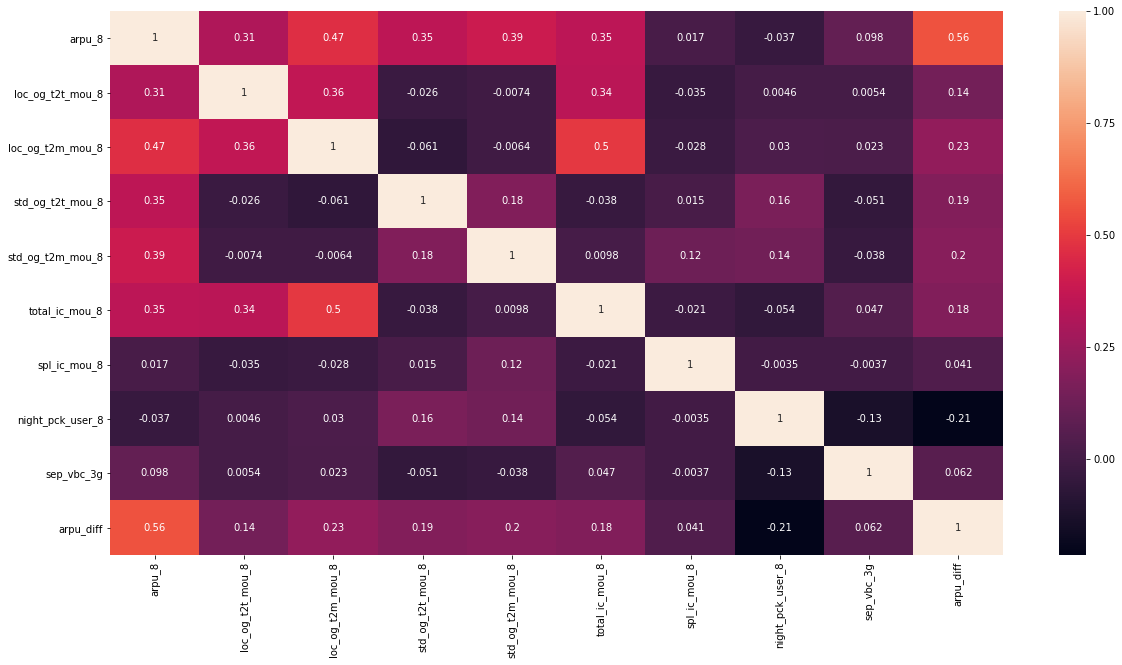

In [248]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_1[rfecol].corr(),annot = True)

In [249]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [250]:
y_train_pred[:10]

array([0.0718823 , 0.01028378, 0.00536006, 0.09019168, 0.00453282,
       0.09416257, 0.001155  , 0.00119416, 0.15241191, 0.34682587])

In [251]:
y_train_pred_final = pd.DataFrame({'Converted':y_train_1.values, 'Converted_prob':y_train_pred})
y_train_pred_final['mobile_number'] = y_train_1.index
y_train_pred_final.head()

,Converted,Converted_prob,mobile_number
0,0,0.071882,82315
1,0,0.010284,27966
2,0,0.005360,92204
3,0,0.090192,39657
4,0,0.004533,36051


In [252]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,mobile_number,predicted
0,0,0.071882,82315,0
1,0,0.010284,27966,0
2,0,0.005360,92204,0
3,0,0.090192,39657,0
4,0,0.004533,36051,0


In [253]:
y_train_1.head()

82315    0
27966    0
92204    0
39657    0
36051    0
Name: churn, dtype: int32

In [254]:
from sklearn import metrics

In [255]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[19058   219]
 [ 1268   422]]


In [256]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
m1_1 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9290790289502552


In [257]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("="*123)
# Let's see the sensitivity of our logistic regression model
print('\nSensitivity : ', TP / float(TP+FN))

# Let us calculate specificity
print('\nSpecificity : ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('\nfalse postive rate : ',FP/ float(TN+FP))

# positive predictive value 
print('\npositive predictive value : ', TP / float(TP+FP))

# Negative predictive value
print('\nNegative predictive value : ',TN / float(TN+ FN))

## Misclassification rate

print('\nMisclassification Rate : ',(FN+FP)/(TP+TN+FP+FN),"\n")
print("="*123)


Sensitivity :  0.24970414201183433

Specificity :  0.9886393110961249

false postive rate :  0.011360688903875085

positive predictive value :  0.6583463338533542

Negative predictive value :  0.9376168454196595

Misclassification Rate :  0.07092097104974483 



In [258]:
def draw_roc( actual, probs ):
    plt.figure(figsize=(15,10))
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    return None

In [259]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

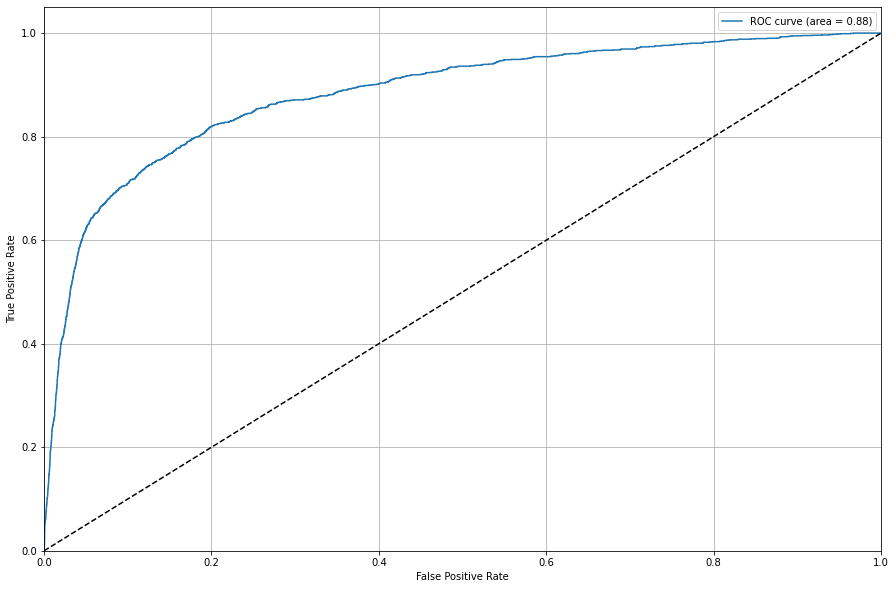

In [260]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [261]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,mobile_number,predicted,final_predicted
0,0,0.071882,82315,0,0
1,0,0.010284,27966,0,0
2,0,0.005360,92204,0,0
3,0,0.090192,39657,0,0
4,0,0.004533,36051,0,0


In [263]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9278866790671054

In [264]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[18467,   810],
       [  702,   988]], dtype=int64)

In [265]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

print("="*123)
# Let's see the sensitivity of our logistic regression model
print('\nSensitivity : ', TP / float(TP+FN))

# Let us calculate specificity
print('\nSpecificity : ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('\nfalse postive rate : ',FP/ float(TN+FP))

# positive predictive value 
print('\npositive predictive value : ', TP / float(TP+FP))

# Negative predictive value
print('\nNegative predictive value : ',TN / float(TN+ FN))

## Misclassification rate

print('\nMisclassification Rate : ',(FN+FP)/(TP+TN+FP+FN),"\n")
print("="*123)


Sensitivity :  0.24970414201183433

Specificity :  0.9886393110961249

false postive rate :  0.011360688903875085

positive predictive value :  0.6583463338533542

Negative predictive value :  0.9376168454196595

Misclassification Rate :  0.07092097104974483 



**Precision and Recall**

In [266]:
from sklearn.metrics import precision_score, recall_score

In [267]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6583463338533542

In [268]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.24970414201183433

**Precision and Recall Tradeoff**

In [269]:
from sklearn.metrics import precision_recall_curve

In [270]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 20962    0
 20963    0
 20964    0
 20965    0
 20966    1
 Name: Converted, Length: 20967, dtype: int32, 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 20962    0
 20963    0
 20964    0
 20965    0
 20966    1
 Name: predicted, Length: 20967, dtype: int64)

In [271]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

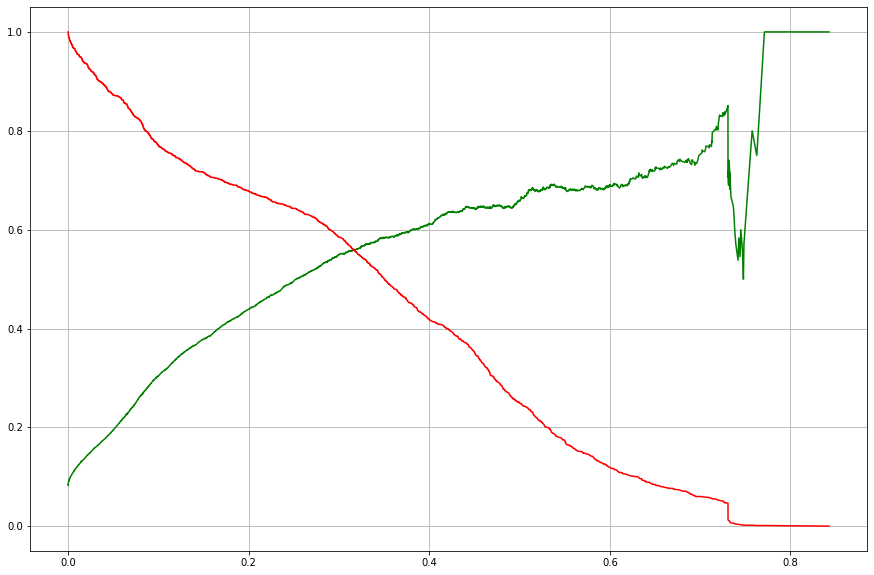

In [272]:
plt.figure(figsize=(15,10))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(True)
plt.show()

**Making Predictions on Test Set**

In [273]:
X_test_2 = X_test_1[rfecol]
X_test_2.head()

,arpu_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,total_ic_mou_8,spl_ic_mou_8,night_pck_user_8,sep_vbc_3g,arpu_diff
99071,-0.412113,-0.373878,-0.403332,-0.416641,-0.452620,-0.516041,-0.264379,-0.936969,-0.218842,0.145177
11520,-0.027456,0.301140,2.004158,-0.416641,-0.452620,2.628379,-0.264379,1.066175,-0.218842,-0.800649
24918,-1.121120,-0.483801,-0.586341,-0.416641,-0.452620,-0.626111,-0.264379,-0.936969,-0.218842,0.185958
49677,-0.167731,-0.454951,-0.647638,-0.416641,-0.438263,-0.776295,-0.264379,1.066175,-0.218842,-3.112587
21537,-0.668165,-0.368181,0.383583,-0.416641,-0.383717,-0.054203,-0.264379,1.066175,-0.218842,0.186568


In [274]:
X_test_sm = sm.add_constant(X_test_2)
y_test_pred = res.predict(X_test_sm)

In [275]:
y_test_pred[:10]

99071    0.041951
11520    0.000354
24918    0.050051
49677    0.718543
21537    0.041199
28822    0.004993
86074    0.114774
48871    0.000258
92281    0.012162
4474     0.044746
dtype: float64

In [276]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [277]:
# Let's see the head
y_pred_1.head()

,0
99071,0.041951
11520,0.000354
24918,0.050051
49677,0.718543
21537,0.041199


In [278]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [279]:
# Putting mobile_number to index
y_test_df['mobile_number'] = y_test_df.index

In [280]:
# Removing index from dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [281]:
# y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [282]:
y_pred_final.head()

,churn,mobile_number,0
0,0,0,0.041951
1,0,1,0.000354
2,0,2,0.050051
3,0,3,0.718543
4,0,4,0.041199


In [283]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [284]:
# Let's see the head of y_pred_final
y_pred_final.head()

,churn,mobile_number,Converted_prob
0,0,0,0.041951
1,0,1,0.000354
2,0,2,0.050051
3,0,3,0.718543
4,0,4,0.041199


In [285]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,churn,mobile_number,Converted_prob,final_predicted
0,0,0,0.041951,0
1,0,1,0.000354,0
2,0,2,0.050051,0
3,0,3,0.718543,1
4,0,4,0.041199,0


In [286]:
# Let's check the overall accuracy.
m1_2 = metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)
print("Accuracy for Test data: ", m1_2)

Accuracy for Test data:  0.9217671934119742


In [287]:
confusion3 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion3

array([[7884,  359],
       [ 344,  399]], dtype=int64)

In [288]:
TP3 = confusion3[1,1] # true positive 
TN3 = confusion3[0,0] # true negatives
FP3 = confusion3[0,1] # false positives
FN3 = confusion3[1,0] # false negatives

In [289]:
# Let's see the sensitivity of our logistic regression model
TP3 / float(TP3+FN3)

0.5370121130551817

In [290]:
# Let us calculate specificity
TN3 / float(TN3+FP3)

0.9564478951837924

# <font color='purple'>--------------------------------------------------------------------------------------------------------------
# <font color='purple'>--------------------------------------------------------------------------------------------------------------

# PCA

In [132]:
#Improting PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [133]:
#executing PCA on train data set 

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [134]:
print(pca.components_)

[[ 1.26316204e-01  1.35815466e-01  1.23833746e-01 ... -1.08330093e-01
  -4.70520152e-02 -8.66165573e-03]
 [ 6.41115356e-02  7.23831449e-02  9.82684005e-02 ...  7.01773563e-02
   1.01305340e-01  9.54718845e-02]
 [ 1.17769216e-01  1.57735480e-01  1.53137828e-01 ...  1.24160071e-01
   1.85159879e-01  1.62664924e-01]
 ...
 [-4.52451939e-03 -5.45828261e-03  1.75165967e-02 ...  8.08279728e-04
  -3.04242698e-04 -3.83416492e-04]
 [-0.00000000e+00  3.95996446e-17  1.15313136e-16 ...  8.94098380e-17
   3.03438482e-16 -1.61030104e-16]
 [ 0.00000000e+00 -1.68363186e-17  5.16971709e-17 ... -1.46384271e-16
   1.43017291e-16  4.91459792e-17]]


In [135]:
print(pca.components_)
colnames = list(X_train.columns)
# pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 1.26316204e-01  1.35815466e-01  1.23833746e-01 ... -1.08330093e-01
  -4.70520152e-02 -8.66165573e-03]
 [ 6.41115356e-02  7.23831449e-02  9.82684005e-02 ...  7.01773563e-02
   1.01305340e-01  9.54718845e-02]
 [ 1.17769216e-01  1.57735480e-01  1.53137828e-01 ...  1.24160071e-01
   1.85159879e-01  1.62664924e-01]
 ...
 [-4.52451939e-03 -5.45828261e-03  1.75165967e-02 ...  8.08279728e-04
  -3.04242698e-04 -3.83416492e-04]
 [-0.00000000e+00  3.95996446e-17  1.15313136e-16 ...  8.94098380e-17
   3.03438482e-16 -1.61030104e-16]
 [ 0.00000000e+00 -1.68363186e-17  5.16971709e-17 ... -1.46384271e-16
   1.43017291e-16  4.91459792e-17]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.126316,0.064112,0.117769,-0.026130,-0.062772,0.216850,-0.002489,0.051252,-0.000450,-0.018967,arpu_6
1,0.135815,0.072383,0.157735,-0.015826,-0.059488,0.037297,0.049636,0.064704,0.005718,0.023572,arpu_7
2,0.123834,0.098268,0.153138,-0.004486,-0.055735,-0.159194,0.092095,0.080512,-0.000927,0.059077,arpu_8
3,0.110705,-0.048628,0.085343,0.028376,-0.073564,0.034229,-0.283927,0.084202,0.025514,-0.070902,onnet_mou_6
4,0.118354,-0.048618,0.108475,0.035736,-0.075100,-0.071608,-0.272491,0.090416,0.037183,-0.055505,onnet_mou_7
5,0.114422,-0.030699,0.113961,0.041553,-0.072154,-0.163088,-0.224945,0.095490,0.026940,-0.032848,onnet_mou_8
6,0.142322,0.002608,0.064423,0.013761,-0.025870,0.172860,0.192895,-0.126074,-0.054673,-0.064390,offnet_mou_6
7,0.150720,0.004255,0.089648,0.018037,-0.020328,0.051642,0.239517,-0.132020,-0.056417,-0.037803,offnet_mou_7
8,0.146077,0.029297,0.094599,0.025333,-0.021418,-0.077484,0.246817,-0.095142,-0.056095,-0.015392,offnet_mou_8
9,0.024425,0.006477,0.032361,-0.055414,0.053087,-0.001569,0.032768,0.185188,-0.271196,0.030024,roam_ic_mou_6


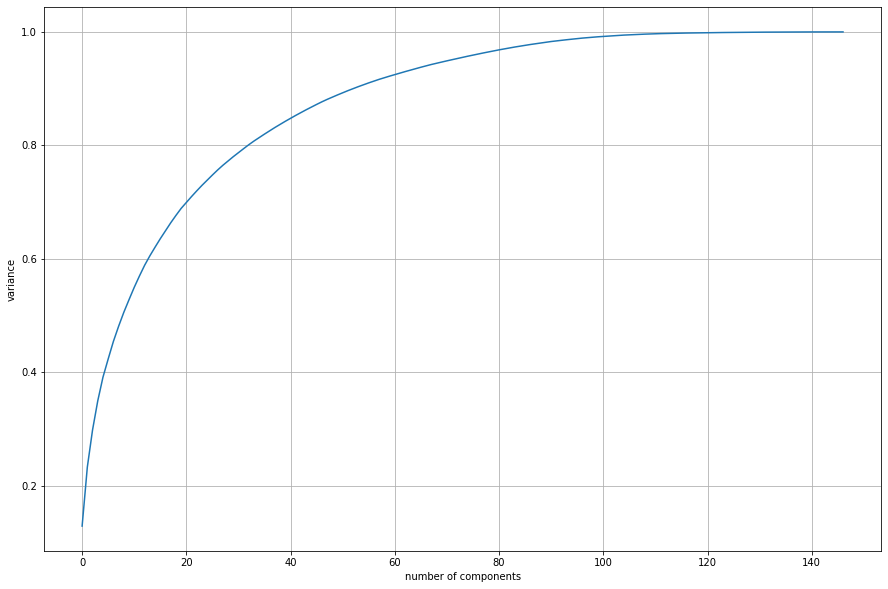

In [136]:
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('variance')
plt.grid(True)
plt.show()

### <font color='green'>Observations :
- As we can observe 40 - 60 component explain 90% of variance in the data set.

In [137]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20967, 50)

In [138]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

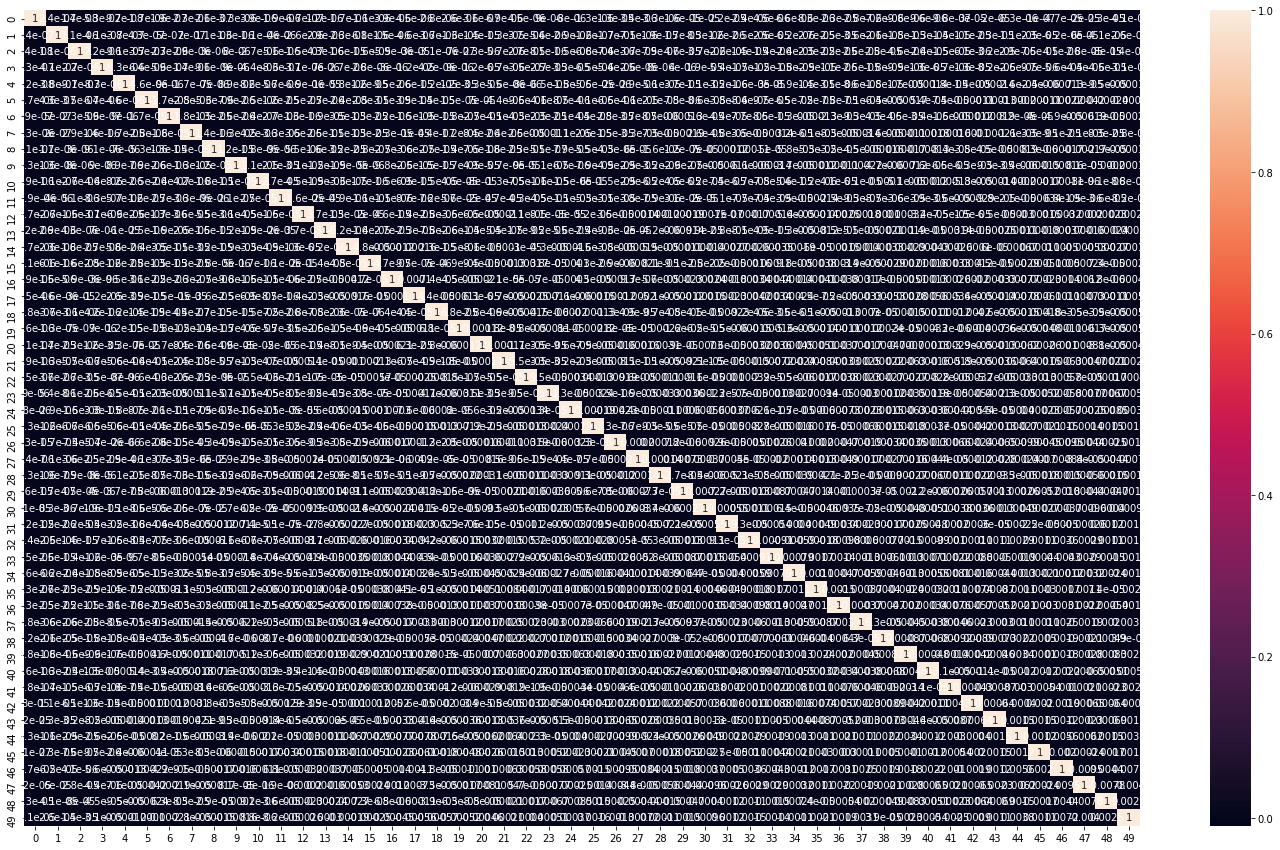

In [139]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (25,15))
sns.heatmap(corrmat,annot = True)

In [140]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.00719362063387517 , min corr:  -0.009465970031493177


### <font color='green'>Observations :
- max corr: **`0.007193620633875171`** , min corr:  **`-0.009465970031493177`**
- Correlations are very close to 0

In [141]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape


(8986, 50)

# <font color='purple'>--------------------------------------------------------------------------------------------------------------

# Model 2 : Decision Tree With PCA

In [143]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(class_weight='balanced',max_depth=5)
dt_default.fit(df_train_pca,y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [144]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print("="*123)
print("\nClassification report : \n",classification_report(y_test,y_pred_default))
print("="*123)
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred_default))
print('/nAcuracy Score :', accuracy_score(y_test,y_pred_default))
print("="*123)


Classification report : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      8243
           1       0.28      0.72      0.41       743

    accuracy                           0.83      8986
   macro avg       0.63      0.78      0.65      8986
weighted avg       0.91      0.83      0.86      8986


Confusion Matrix : 
 [[6896 1347]
 [ 211  532]]
/nAcuracy Score : 0.8266191853995104


In [145]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives
print("="*123)
print('\nAcuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('\nSensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('\nSpecificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('\nfalse postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('\npositive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('\nNegative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('\nMisclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))
print(" ")
print("="*123)


Acuracy Score 0.8266191853995104

Sensitivity:  0.7160161507402423

Specificity:  0.8365886206478224

false postive rate:  0.16341137935217762

positive predictive value:  0.2831293241085684

Negative predictive value:  0.9703109610243422

Misclassification Rate:  0.17338081460048965
 


## Hyperparameter tuning

In [146]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [147]:
y_train.shape

(20967,)

In [148]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.253106,0.009156,0.003849,0.002361,1,{'max_depth': 1},0.802814,0.822127,0.781064,0.824469,0.781064,0.802308,0.018904,38,0.796936,0.826328,0.787171,0.829260,0.786038,0.805146,0.018899
1,0.481758,0.010480,0.001937,0.001318,2,{'max_depth': 2},0.869099,0.822127,0.861197,0.875745,0.867160,0.859064,0.019045,29,0.866392,0.826328,0.871885,0.883391,0.869620,0.863523,0.019460
2,0.692524,0.013526,0.002560,0.001620,3,{'max_depth': 3},0.804721,0.824273,0.811114,0.824231,0.809444,0.814757,0.008032,37,0.809098,0.827043,0.815369,0.828186,0.809765,0.817892,0.008240
3,0.887594,0.018865,0.001974,0.000674,4,{'max_depth': 4},0.800191,0.783500,0.815407,0.757691,0.818269,0.795011,0.022400,39,0.802480,0.791808,0.832181,0.768690,0.831167,0.805265,0.024174
4,1.093445,0.015355,0.003042,0.001630,5,{'max_depth': 5},0.810205,0.840010,0.819223,0.823515,0.806105,0.819812,0.011851,36,0.817206,0.845883,0.834685,0.832717,0.823835,0.830865,0.009793


<Figure size 432x288 with 0 Axes>

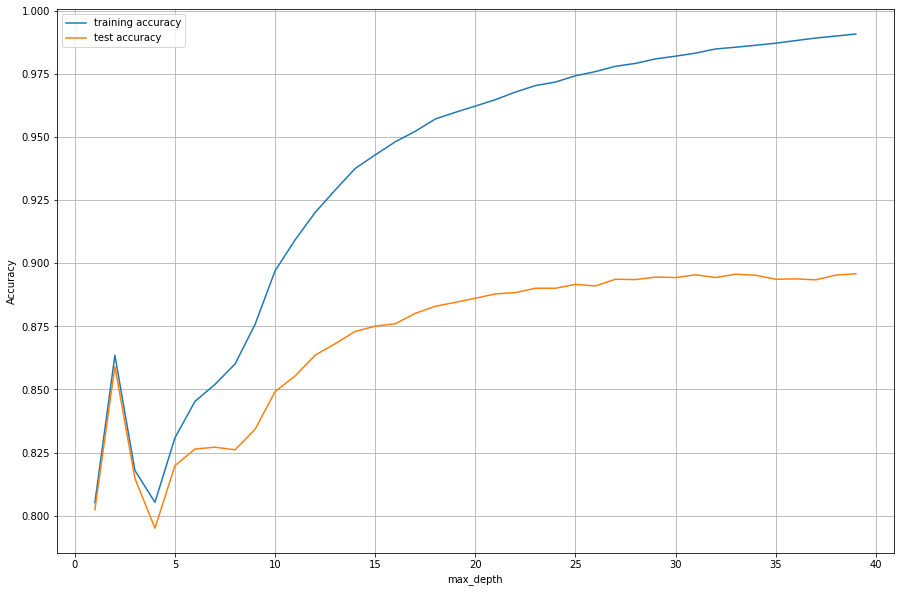

In [149]:
# plotting accuracies with max_depth
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [150]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [151]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.505062,0.212376,0.001600,0.003200,5,{'min_samples_leaf': 5},0.871245,0.871245,0.865490,0.857858,0.862390,0.865646,0.005176,1,0.946342,0.950158,0.944736,0.946763,0.945034,0.946607,0.001933
1,2.231854,0.180694,0.004725,0.006268,25,{'min_samples_leaf': 25},0.815451,0.830949,0.820892,0.818984,0.810398,0.819335,0.006818,2,0.853157,0.859834,0.858770,0.862764,0.861095,0.859124,0.003267
2,2.084569,0.126130,0.007842,0.006978,45,{'min_samples_leaf': 45},0.814258,0.806629,0.796089,0.783449,0.799905,0.800067,0.010358,3,0.833363,0.829071,0.825385,0.822404,0.829915,0.828027,0.003788
3,1.979494,0.126262,0.003124,0.006248,65,{'min_samples_leaf': 65},0.812351,0.785408,0.805628,0.785357,0.792988,0.796347,0.010900,7,0.825136,0.803971,0.821748,0.807977,0.822344,0.816235,0.008550
4,1.873665,0.089054,0.008143,0.007332,85,{'min_samples_leaf': 85},0.812589,0.806152,0.805628,0.781302,0.782733,0.797682,0.013030,5,0.825911,0.815596,0.814952,0.796471,0.808871,0.812360,0.009648


<Figure size 432x288 with 0 Axes>

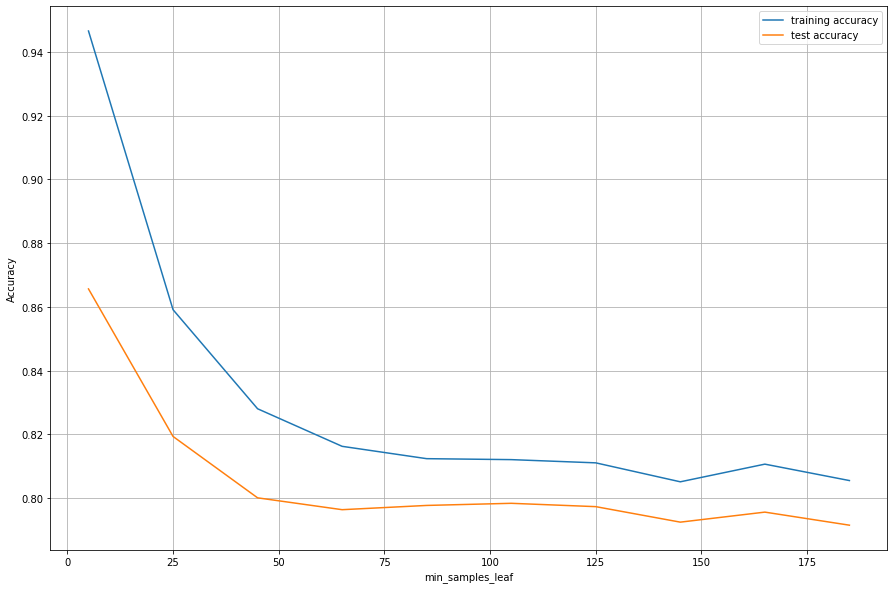

In [152]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [153]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [154]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.773826,0.219592,0.006254,0.007659,5,{'min_samples_split': 5},0.895804,0.895565,0.894348,0.889816,0.888624,0.892832,0.003013,1,0.994813,0.995588,0.994873,0.995588,0.994158,0.995004,0.000539
1,2.766211,0.235546,0.000000,0.000000,25,{'min_samples_split': 25},0.859084,0.859323,0.853804,0.854042,0.860005,0.857252,0.002735,2,0.936326,0.939903,0.936747,0.938417,0.948253,0.939929,0.004352
2,2.736781,0.221519,0.001597,0.003193,45,{'min_samples_split': 45},0.834526,0.836671,0.831863,0.827808,0.831386,0.832451,0.003005,3,0.902760,0.903237,0.902945,0.906284,0.912186,0.905482,0.003591
3,2.328586,0.402461,0.000825,0.001169,65,{'min_samples_split': 65},0.825703,0.819981,0.813022,0.812306,0.808013,0.815806,0.006263,4,0.884755,0.872652,0.870574,0.880708,0.883928,0.878523,0.005839
4,2.266809,0.304198,0.004902,0.004158,85,{'min_samples_split': 85},0.816643,0.816643,0.810160,0.811352,0.795850,0.810130,0.007619,5,0.865975,0.858165,0.859246,0.868248,0.868845,0.864096,0.004517


<Figure size 432x288 with 0 Axes>

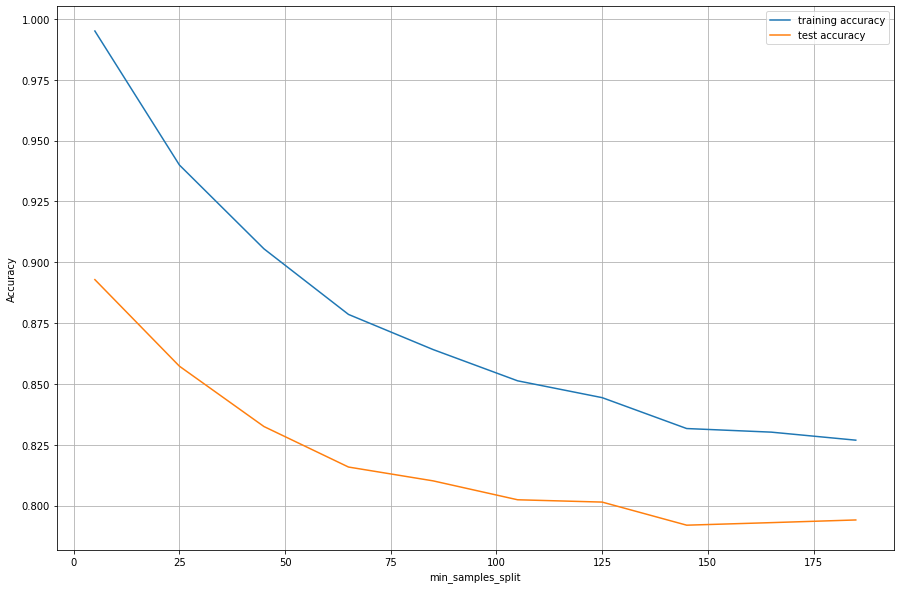

In [155]:
# plotting accuracies with min_samples_split
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [156]:
#parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',cv = n_folds, verbose = 1, n_jobs = -1)

grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 13.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                  

In [157]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.300924,0.201530,0.003202,0.006404,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.809728,0.828088,0.832578,0.842118,0.819938,0.826489,0.011025,4
1,2.394838,0.285703,0.003200,0.003920,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.809728,0.828088,0.832578,0.842595,0.819461,0.826489,0.011219,4


In [158]:
# printing the optimal accuracy score and hyperparameters
print("="*123)
m2_1 = grid_search.best_score_
print("\nBest Accuracy : ", m2_1 )
print(" ")
print("="*123)
print(grid_search.best_estimator_)


Best Accuracy :  0.8418467114990222
 
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [159]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100,max_depth=10, 
                                  min_samples_leaf=5,min_samples_split=5)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [160]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
print("="*123)
print("\nConfusion Matrix: \n",confusion_tree_hyper,"\n")
print("="*123)


Confusion Matrix: 
 [[6945 1298]
 [ 255  488]] 



In [161]:
TP = confusion_tree_hyper[1,1] # True positive 
TN = confusion_tree_hyper[0,0] # True negatives
FP = confusion_tree_hyper[0,1] # False positives
FN = confusion_tree_hyper[1,0] # False negatives

print("="*123)
# sensitivity of model
m2_2 = (TP+TN)/(TP+TN+FP+FN)
print("\n Accuracy for Test data : ", m2_2)
print('\nSensitivity : ', TP / float(TP+FN))

# Specificity
print('\nSpecificity : ',TN / float(TN+FP))

# False postive rate
print('\nfalse postive rate : ',FP/ float(TN+FP))

# positive predictive value 
print('\npositive predictive value : ', TP / float(TP+FP))

# Negative predictive value
print('\nNegative predictive value : ',TN / float(TN+ FN))

## Misclassification rate

print('\nMisclassification Rate : ',(FN+FP)/(TP+TN+FP+FN),"\n")
print("="*123)


 Accuracy for Test data :  0.8271756064989985

Sensitivity :  0.6567967698519516

Specificity :  0.8425330583525416

false postive rate :  0.15746694164745845

positive predictive value :  0.2732362821948488

Negative predictive value :  0.9645833333333333

Misclassification Rate :  0.17282439350100157 



# <font color='purple'>--------------------------------------------------------------------------------------------------------------

# Model 3 : RandomForestClassifier with PCA

In [162]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [163]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8163,   80],
       [ 637,  106]], dtype=int64)

In [164]:
TN = confusion_rf[0,0] # True positive 
TP = confusion_rf[1,1] # True negatives
FP = confusion_rf[0,1] # False positives
FN = confusion_rf[1,0] # False negatives

print("="*123)
# Let's see the sensitivity of our logistic regression model
print('\nSensitivity : ', TP / float(TP+FN))

# Let us calculate specificity
print('\nSpecificity : ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('\nfalse postive rate : ',FP/ float(TN+FP))

# positive predictive value 
print('\npositive predictive value : ', TP / float(TP+FP))

# Negative predictive value
print('\nNegative predictive value : ',TN / float(TN+ FN))

## Misclassification rate

print('\nMisclassification Rate : ',(FN+FP)/(TP+TN+FP+FN),"\n")
print("="*123)


Sensitivity :  0.1426648721399731

Specificity :  0.990294795584132

false postive rate :  0.009705204415868009

positive predictive value :  0.5698924731182796

Negative predictive value :  0.9276136363636364

Misclassification Rate :  0.07979078566659248 



In [165]:
# Hyperparameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [166]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.453895,0.032227,0.007385,0.005371,2,{'max_depth': 2},0.827849,0.795899,0.803959,0.764131,0.775817,0.793533,0.022228,4,0.823347,0.803374,0.802373,0.768570,0.779421,0.795417,0.019331
1,1.327879,0.018383,0.011565,0.006076,7,{'max_depth': 7},0.883166,0.875298,0.880038,0.887193,0.871214,0.879382,0.005642,3,0.897633,0.889465,0.902349,0.897878,0.889651,0.895395,0.005053
2,1.849060,0.031324,0.015624,0.000010,12,{'max_depth': 12},0.912971,0.916309,0.905557,0.915335,0.913189,0.912672,0.003776,2,0.953258,0.957789,0.952069,0.953261,0.958686,0.955013,0.002684
3,1.607347,0.157225,0.013582,0.004934,17,{'max_depth': 17},0.920839,0.925131,0.919866,0.923205,0.921297,0.922068,0.001878,1,0.974304,0.970011,0.976213,0.973411,0.975677,0.973923,0.002192


<Figure size 432x288 with 0 Axes>

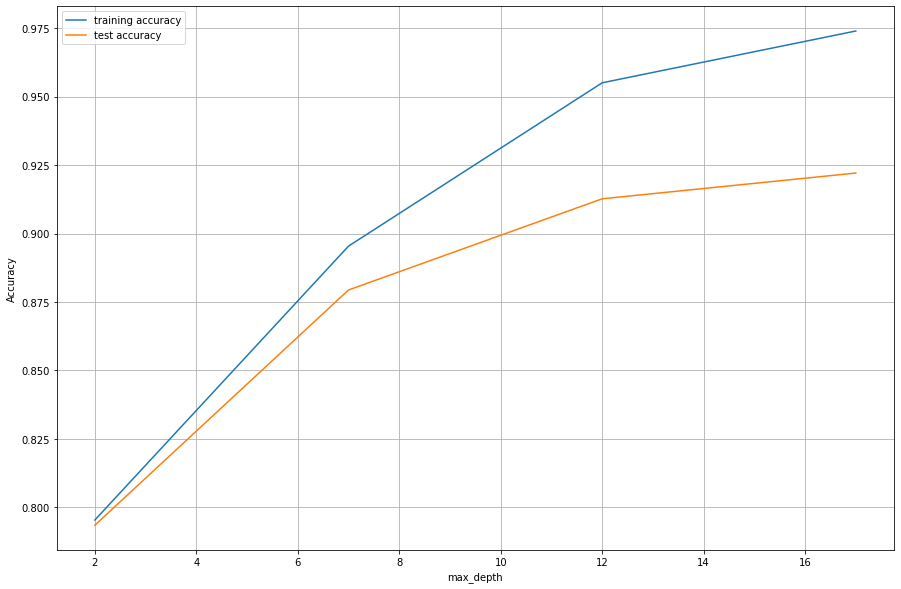

In [167]:
# plotting accuracies with max_depth
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [168]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [169]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.724302,0.140664,0.124479,0.001057,100,{'n_estimators': 100},0.911779,0.914402,0.909850,0.912235,0.911519,0.911957,0.001464,3,0.942348,0.945329,0.945749,0.943663,0.942947,0.944007,0.001325
1,83.738612,0.322299,0.577538,0.013041,500,{'n_estimators': 500},0.912732,0.913209,0.907465,0.911519,0.912950,0.911575,0.002135,4,0.943838,0.945329,0.946882,0.943067,0.944974,0.944818,0.001309
2,150.900375,0.482755,1.033990,0.005471,900,{'n_estimators': 900},0.913925,0.913209,0.907465,0.912473,0.913189,0.912052,0.002339,2,0.943838,0.945210,0.947359,0.943544,0.944676,0.944925,0.001353
3,215.798286,4.163873,1.220824,0.328175,1300,{'n_estimators': 1300},0.914402,0.913925,0.908419,0.912712,0.912235,0.912338,0.002111,1,0.944613,0.945508,0.946047,0.944676,0.944497,0.945068,0.000606


<Figure size 432x288 with 0 Axes>

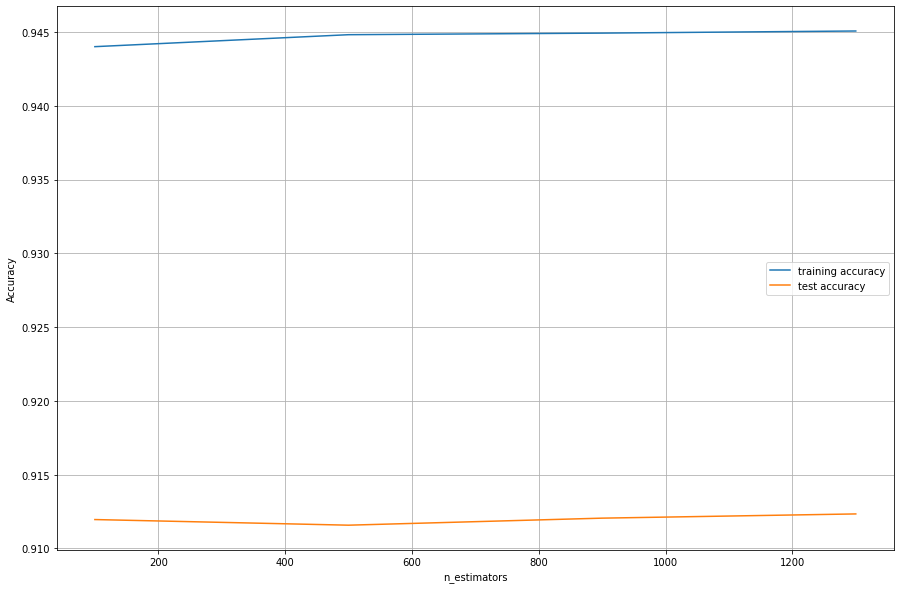

In [170]:
# plotting accuracies with n_estimators
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [171]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [172]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.001738,0.026791,0.015530,0.000644,4,{'max_features': 4},0.899619,0.905818,0.896971,0.893871,0.902695,0.899795,0.004190,5,0.926251,0.937161,0.933051,0.928580,0.931918,0.931392,0.003759
1,1.905188,0.035875,0.013000,0.003187,8,{'max_features': 8},0.907964,0.909394,0.900072,0.906511,0.901503,0.905089,0.003657,4,0.943063,0.937042,0.933826,0.939132,0.931024,0.936817,0.004170
2,3.528716,0.181676,0.017644,0.006491,14,{'max_features': 14},0.904864,0.909871,0.902933,0.907465,0.904603,0.905947,0.002440,3,0.936207,0.940977,0.939967,0.942530,0.936986,0.939333,0.002392
3,4.722363,0.041173,0.014794,0.007778,20,{'max_features': 20},0.910587,0.908918,0.898402,0.904841,0.911281,0.906806,0.004759,2,0.940678,0.941811,0.936986,0.938178,0.942351,0.940001,0.002082
4,5.728590,0.040750,0.014169,0.003090,24,{'max_features': 24},0.908679,0.907964,0.908180,0.907226,0.912712,0.908952,0.001937,1,0.938115,0.939307,0.941934,0.941457,0.941636,0.940490,0.001508


<Figure size 432x288 with 0 Axes>

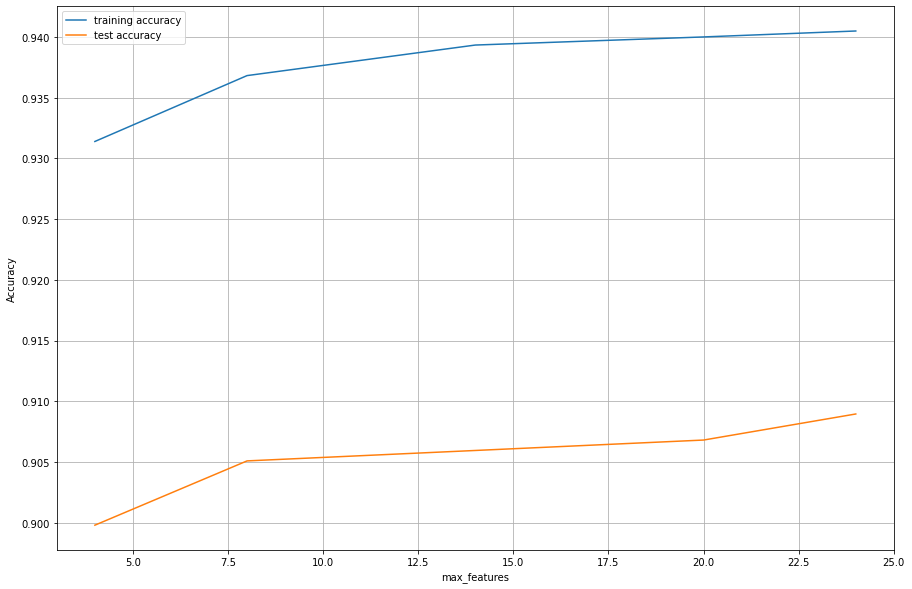

In [173]:
# plotting accuracies with max_features
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [174]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [175]:

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.421838,0.057108,0.011458,0.006070,100,{'min_samples_leaf': 100},0.860515,0.863853,0.861197,0.861436,0.857381,0.860877,0.002080,1,0.872951,0.875276,0.873375,0.874449,0.862048,0.871620,0.004855
1,1.361316,0.047009,0.014686,0.002091,150,{'min_samples_leaf': 150},0.853600,0.830711,0.838063,0.848319,0.851896,0.844518,0.008760,2,0.857092,0.846420,0.853225,0.862346,0.857995,0.855416,0.005352
2,1.266209,0.039380,0.005798,0.007136,200,{'min_samples_leaf': 200},0.843586,0.832141,0.844026,0.851658,0.835917,0.841465,0.006821,3,0.846301,0.842962,0.855550,0.859545,0.840885,0.849048,0.007262
3,1.214375,0.027947,0.012990,0.003291,250,{'min_samples_leaf': 250},0.831187,0.831426,0.833771,0.838063,0.838302,0.834550,0.003102,4,0.833005,0.840696,0.846250,0.843269,0.839037,0.840452,0.004451
4,0.934691,0.105110,0.010023,0.004872,300,{'min_samples_leaf': 300},0.834287,0.805198,0.825423,0.843310,0.825423,0.826728,0.012642,5,0.839146,0.815418,0.835102,0.846667,0.834923,0.834251,0.010334


<Figure size 432x288 with 0 Axes>

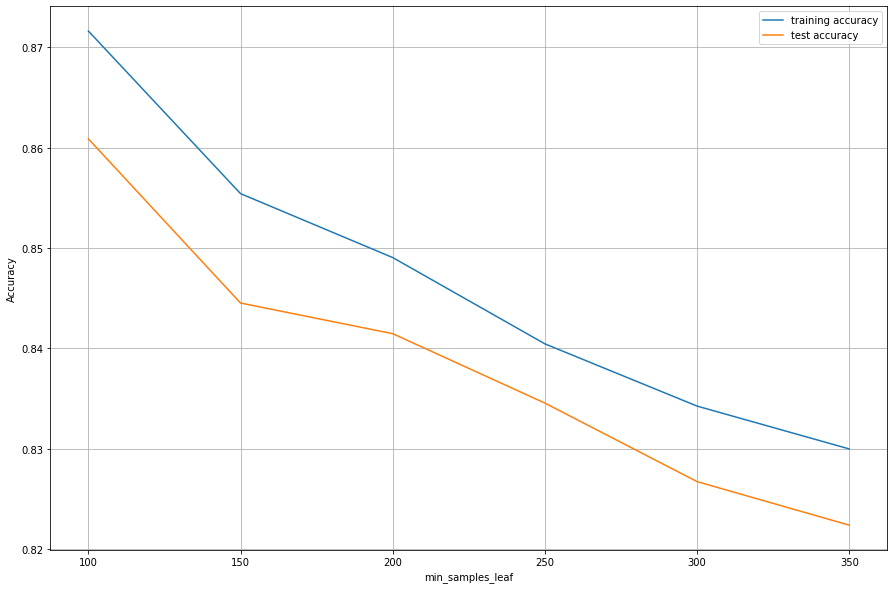

In [176]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [177]:

# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [178]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.468560,0.226516,0.012529,0.004009,200,{'min_samples_split': 200},0.880544,0.871722,0.878846,0.875984,0.880277,0.877474,0.003301,1,0.901628,0.888631,0.902051,0.895791,0.898414,0.897303,0.004898
1,1.769404,0.045704,0.013500,0.004356,250,{'min_samples_split': 250},0.877206,0.871006,0.875268,0.874553,0.881469,0.875900,0.003432,2,0.889883,0.886723,0.891678,0.891976,0.892572,0.890566,0.002121
2,1.715941,0.070079,0.012633,0.006319,300,{'min_samples_split': 300},0.876490,0.869099,0.869067,0.871452,0.868352,0.870892,0.002988,3,0.886365,0.883146,0.886908,0.884583,0.880768,0.884354,0.002233
3,1.660971,0.088399,0.009761,0.008001,350,{'min_samples_split': 350},0.870768,0.860992,0.865729,0.861436,0.857381,0.863261,0.004593,4,0.876885,0.870745,0.886670,0.874031,0.873316,0.876329,0.005528
4,1.615686,0.039369,0.014829,0.001702,400,{'min_samples_split': 400},0.861946,0.833333,0.857620,0.860482,0.857620,0.854199,0.010567,6,0.867585,0.854051,0.871170,0.871766,0.865685,0.866051,0.006408


<Figure size 432x288 with 0 Axes>

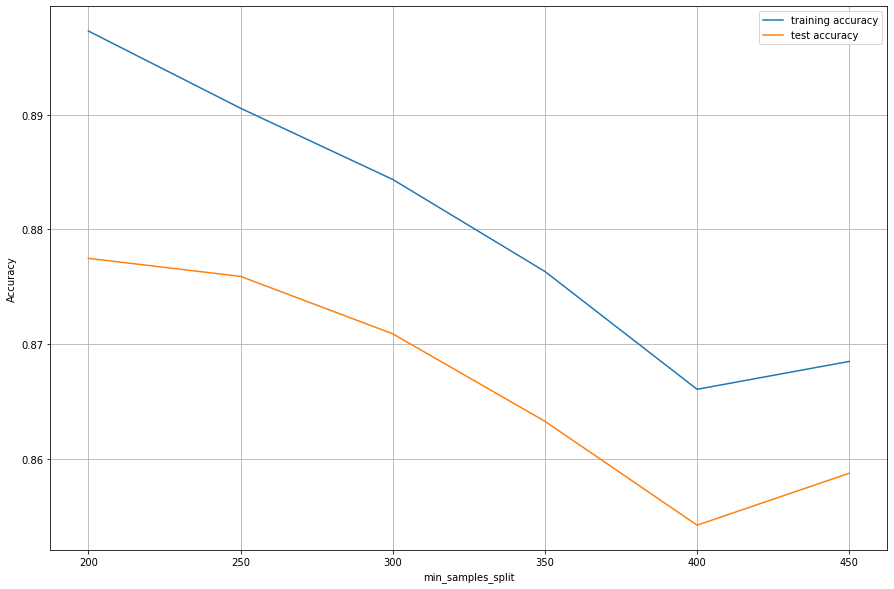

In [179]:
# plotting accuracies with min_samples_split
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [180]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [181]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 17.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [183]:
# printing the optimal accuracy score and hyperparameters
#print(\n'Accuracy :',grid_search.best_score_,'\n',grid_search.best_params_)

In [184]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200)

In [185]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [186]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [187]:
print('='*123)
print('\nClassification Report',classification_report(y_test,y_pred_default))
print('\nConfusion Matrix',confusion_matrix(y_test,y_pred_default))
m3_2 = accuracy_score(y_test,y_pred_default)
print('\nAccuracy Score:  ',m3_2,'\n')
print('='*123)


Classification Report               precision    recall  f1-score   support

           0       0.97      0.88      0.92      8243
           1       0.34      0.71      0.46       743

    accuracy                           0.86      8986
   macro avg       0.66      0.79      0.69      8986
weighted avg       0.92      0.86      0.88      8986


Confusion Matrix [[7244  999]
 [ 219  524]]

Accuracy Score:   0.8644558201647007 



In [188]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7244,  999],
       [ 219,  524]], dtype=int64)

In [189]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print("="*123)
print('\nAccuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('\nSensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('\nSpecificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('\nfalse postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('\npositive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('\nNegative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('\nMisclassification Rate: ',(FN+FP)/(TP+TN+FP+FN),"\n")
print("="*123)


Accuracy Score:   0.8644558201647007

Sensitivity:  0.7052489905787349

Specificity:  0.8788062598568482

false postive rate:  0.12119374014315176

positive predictive value:  0.34405778069599474

Negative predictive value:  0.9706552324802359

Misclassification Rate:  0.13554417983529934 



# <font color='purple'>--------------------------------------------------------------------------------------------------------------

# Model 4: Logistic Regression with PCA

In [190]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [191]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

In [192]:
#Making prediction on the test data
pred_train = model_pca.predict_proba(df_train_pca)
y_pred_default_train = model_pca.predict(df_train_pca)

In [194]:
m4_1 = accuracy_score(y_train,y_pred_default_train)

In [195]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [196]:
# print(classification_report(y_test,y_pred_default))
print("\nConfusion Matrix",confusion_matrix(y_test,y_pred_default))
print("\nAccuracy for Test Data :",accuracy_score(y_test,y_pred_default))


Confusion Matrix [[6695 1548]
 [ 135  608]]

Accuracy for Test Data : 0.8127086579123081


In [197]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=200)

In [198]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [199]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8930678814064514


In [200]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(15, 10))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return fpr, tpr, thresholds

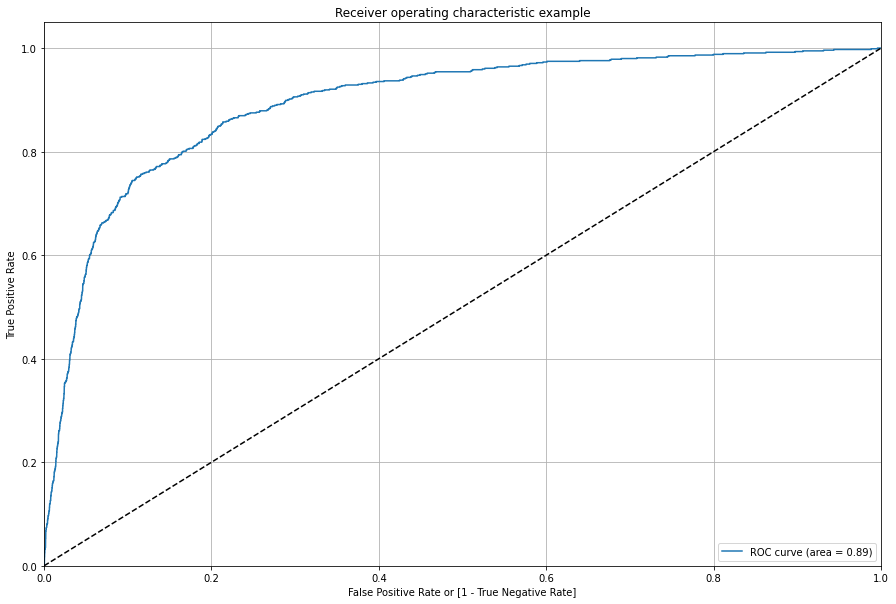

(array([0.00000000e+00, 1.21315055e-04, 1.21315055e-04, ...,
        9.99757370e-01, 9.99878685e-01, 1.00000000e+00]),
 array([0.       , 0.       , 0.0013459, ..., 1.       , 1.       ,
        1.       ]),
 array([1.99699217e+00, 9.96992174e-01, 9.96603224e-01, ...,
        9.53575357e-06, 8.68318796e-06, 5.26506077e-06]))

In [201]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [202]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.161070,1,1,0,0,0,0,0,0,0,0
1,0,0.019712,1,0,0,0,0,0,0,0,0,0
2,0,0.432224,1,1,1,1,1,0,0,0,0,0
3,0,0.945668,1,1,1,1,1,1,1,1,1,1
4,0,0.189938,1,1,0,0,0,0,0,0,0,0


In [203]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.082684  0.000000  1.000000
0.1   0.1  0.401625  0.349873  0.975774
0.2   0.2  0.555642  0.519714  0.954240
0.3   0.3  0.666370  0.642848  0.927322
0.4   0.4  0.749388  0.737717  0.878869
0.5   0.5  0.812709  0.812204  0.818304
0.6   0.6  0.865346  0.874803  0.760431
0.7   0.7  0.897952  0.917384  0.682369
0.8   0.8  0.919319  0.951959  0.557201
0.9   0.9  0.921545  0.983744  0.231494


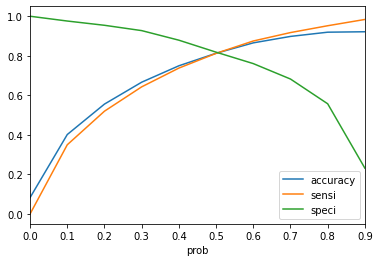

In [204]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [205]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.503343783419509]


In [206]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8243
1     743
Name: churn, dtype: int64

In [207]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6648, 1595],
       [ 130,  613]], dtype=int64)

In [208]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("="*123)
m4_2 = accuracy_score(y_test,y_pred_default)
print('\nAccuracy Score of test data: ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('\nSensitivity : ', TP / float(TP+FN))

# Let us calculate specificity
print('\nSpecificity : ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('\nfalse postive rate : ',FP/ float(TN+FP))

# positive predictive value 
print('\npositive predictive value : ', TP / float(TP+FP))

# Negative predictive value
print('\nNegative predictive value : ',TN / float(TN+ FN))

## Misclassification rate

print('\nMisclassification Rate : ',(FN+FP)/(TP+TN+FP+FN),"\n")
print("="*123)


Accuracy Score of test data:  0.8127086579123081

Sensitivity :  0.8250336473755047

Specificity :  0.8065024869586316

false postive rate :  0.19349751304136845

positive predictive value :  0.2776268115942029

Negative predictive value :  0.9808203009737385

Misclassification Rate :  0.19196527932339194 



# Random Forest model & Top Important features:

In [209]:
from sklearn.model_selection import StratifiedKFold
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

In [210]:
# random forest
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1) # class weight : handle imbalance data set

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, return_train_score=True,verbose=1)

In [211]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [212]:
# print best hyperparameters
print('='*123)
print("\nBest AUC: ", model.best_score_)
print("\nBest hyperparameters: ", model.best_params_ ,'\n')
print('='*123)


Best AUC:  0.8872287333818843

Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4} 



In [213]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8135  108]
 [ 440  303]]
Sensitivity: 	0.41
Specificity: 	0.99
AUC:    	 0.88


In [214]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [215]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   23.7s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=12,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [216]:
# OOB score
rf_model.oob_score_

0.9448657414031574

In [217]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8142  101]
 [ 446  297]]
Sensitivity: 	0.4
Specificity: 	0.99
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [218]:
# predictors
features = X_1.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,5.700818
1,total_og_mou_8,5.298795
2,loc_ic_mou_8,4.490159
3,loc_ic_t2m_mou_8,4.005403
4,arpu_diff,3.584054
5,loc_og_t2m_mou_8,3.503591
6,loc_ic_t2t_mou_8,2.917107
7,total_rech_amt_8,2.782004
8,loc_og_t2t_mou_8,2.674872
9,arpu_8,2.674170


In [219]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

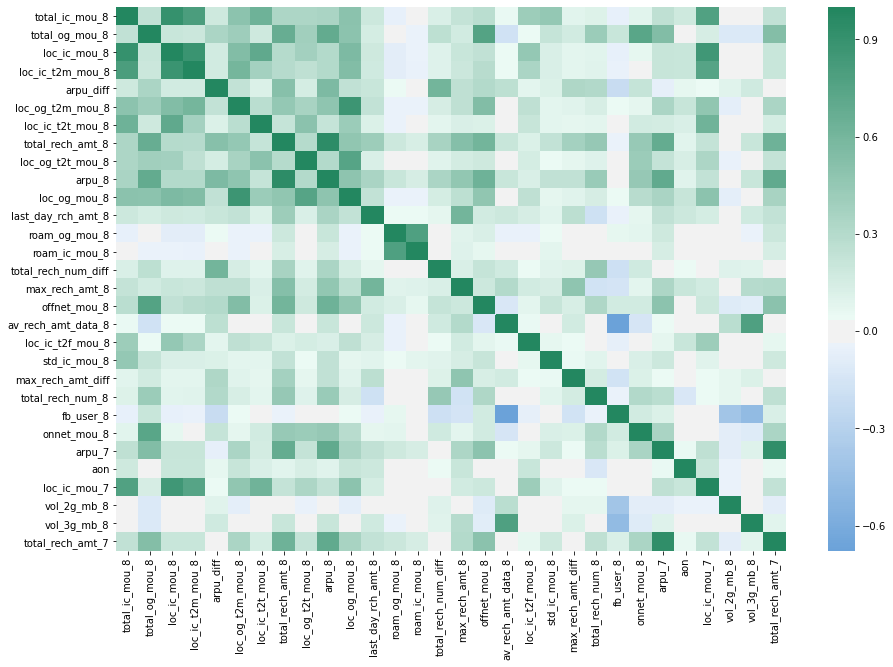

In [311]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(15,10)
mycmap = sns.diverging_palette(250, 150, s=90, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

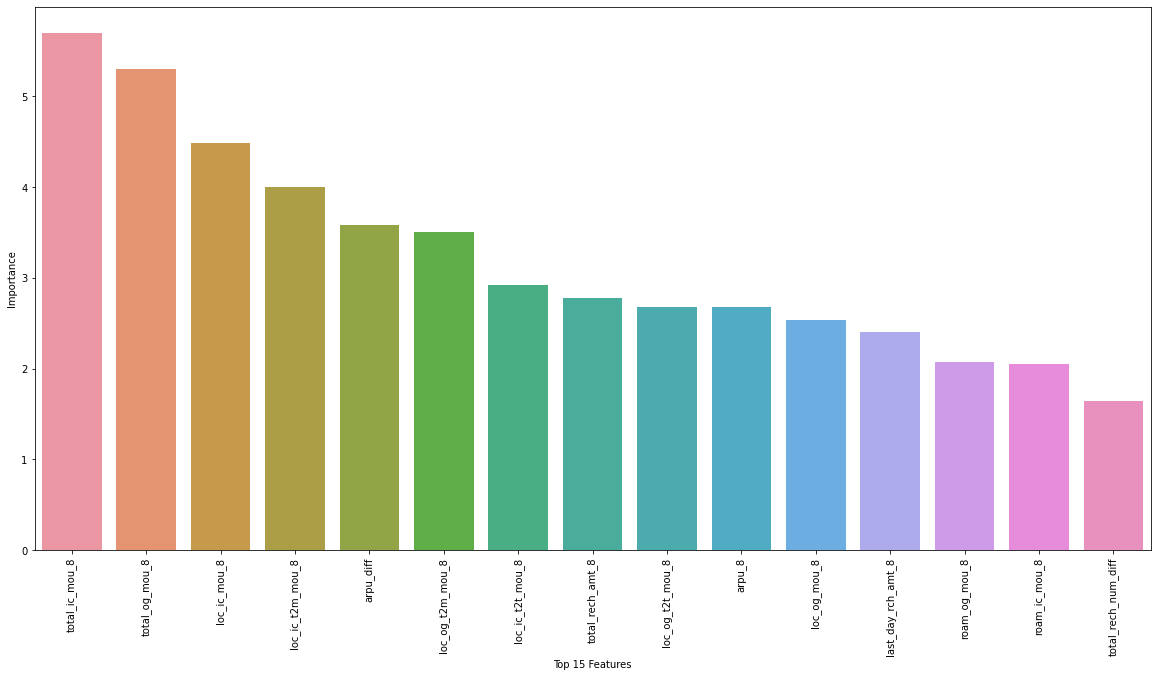

In [221]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='variables', y= 'importance_percentage', data=feature_importance[0:15])
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.xticks(rotation=90)
plt.show()

# --------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------

In [299]:
from prettytable import PrettyTable

summary = PrettyTable()

summary.field_names = ["Model", "Hyperparameter", "Train_AUC", "Test-AUC"]

summary.add_row(["Logistic Regression (RFE)","-", round(m1_1,3),round(m1_2,3)])
summary.add_row(["Decision Tree (PCA)", "Depth: "+ '10' +"|Samples_split : " + '5', round(m2_1,3),round(m2_2,3)])
summary.add_row(["Random Forest (PCA)", "Depth: "+ '10' +"|Samples_split :" + '200', '0.873',round(m3_2,3)])
summary.add_row(["Logistic Regression (PCA)", "-" , round(m4_1,3),round(m4_2,3)])
summary.add_row(["Random Forest feature importance", "Depth: "+ 'None' +"|Samples_split: " + '2', '0.89' ,'0.88'])
print(summary)

+----------------------------------+------------------------------+-----------+----------+
|              Model               |        Hyperparameter        | Train_AUC | Test-AUC |
+----------------------------------+------------------------------+-----------+----------+
|    Logistic Regression (RFE)     |              -               |   0.929   |  0.922   |
|       Decision Tree (PCA)        | Depth: 10|Samples_split : 5  |   0.842   |  0.827   |
|       Random Forest (PCA)        | Depth: 10|Samples_split :200 |   0.873   |  0.864   |
|    Logistic Regression (PCA)     |              -               |   0.816   |  0.813   |
| Random Forest feature importance | Depth: None|Samples_split: 2 |    0.89   |   0.88   |
+----------------------------------+------------------------------+-----------+----------+


# <font color='green'>Observations:
    
Top 15 Features Importance are as follows:
<ol><li><strong>total_ic_mou_8</strong>
<li><strong>total_og_mou_8</strong>
<li><strong>loc_ic_mou_8</strong>
<li><strong>loc_ic_t2m_mou_8</strong>
<li><strong>arpu_diff</strong>
<li><strong>loc_og_t2m_mou_8</strong>
<li><strong>loc_ic_t2t_mou_8</strong>
<li><strong>total_rech_amt_8</strong>
<li><strong>loc_og_t2t_mou_8</strong>
<li><strong>arpu_8</strong></li>  
<li><strong>loc_og_mou_8</strong></li>
<li><strong>last_day_rch_amt_8</strong></li>
<li><strong>roam_og_mou_8</strong></li> 
<li><strong>roam_ic_mou_8</strong></li> 
<li><strong>total_rech_num_diff</strong></li> 
</ul>
        
So, if we look at the above features, one common link is that the Model has figured out that the 8th month activity is
crucial in deciding whether the customer will churn or not.
    
Coming to the Models themselves, we will be looking at the Models results on `PrettyTable` above:
    
Out of all the models, Random Forest seems to be the best performing model because it has given better scores as compared to the other models.


# --------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------